<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/AGC27_2_1_HLC_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [301]:
#License: GPL 
#Creator: Mike Smith https://github.com/gomlfx 
#designed for colab/kaggle/Jupyter

In [302]:
#!pip install autogluon
#!pip install --upgrade mxnet

In [303]:
import pandas as pd
import numpy as np
#import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing

#autogluon
from autogluon.tabular import TabularDataset, TabularPredictor

In [304]:
#metatrader5 file formatv'
df=pd.read_table('/content/GBPUSD_Daily_199305120000_202205130000.csv')

In [305]:
print(df.head())
print(df.tail())
df.info()

       <DATE>  <OPEN>  <HIGH>   <LOW>  <CLOSE>  <TICKVOL>  <VOL>  <SPREAD>
0  1993.05.12  1.5370  1.5445  1.5290   1.5338       2781      0        50
1  1993.05.13  1.5328  1.5360  1.5180   1.5225       2571      0        50
2  1993.05.14  1.5228  1.5415  1.5200   1.5387       2711      0        50
3  1993.05.17  1.5365  1.5460  1.5309   1.5355       2921      0        50
4  1993.05.18  1.5350  1.5380  1.5237   1.5365       2711      0        50
          <DATE>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  <TICKVOL>  <VOL>  \
7537  2022.05.09  1.23475  1.24062  1.22607  1.23288     132787      0   
7538  2022.05.10  1.23290  1.23760  1.22913  1.23145     141136      0   
7539  2022.05.11  1.23120  1.24002  1.22374  1.22427     141912      0   
7540  2022.05.12  1.22463  1.22515  1.21648  1.21961     162435      0   
7541  2022.05.13  1.21963  1.22141  1.21921  1.22116       6416      0   

      <SPREAD>  
7537         0  
7538         0  
7539         0  
7540         0  
7541         0  
<cl

In [306]:
df

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,1993.05.12,1.53700,1.54450,1.52900,1.53380,2781,0,50
1,1993.05.13,1.53280,1.53600,1.51800,1.52250,2571,0,50
2,1993.05.14,1.52280,1.54150,1.52000,1.53870,2711,0,50
3,1993.05.17,1.53650,1.54600,1.53090,1.53550,2921,0,50
4,1993.05.18,1.53500,1.53800,1.52370,1.53650,2711,0,50
...,...,...,...,...,...,...,...,...
7537,2022.05.09,1.23475,1.24062,1.22607,1.23288,132787,0,0
7538,2022.05.10,1.23290,1.23760,1.22913,1.23145,141136,0,0
7539,2022.05.11,1.23120,1.24002,1.22374,1.22427,141912,0,0
7540,2022.05.12,1.22463,1.22515,1.21648,1.21961,162435,0,0


In [307]:
d = df[["<OPEN>","<HIGH>","<LOW>","<CLOSE>"]]
df = pd.DataFrame(data=d)
df

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,1.53700,1.54450,1.52900,1.53380
1,1.53280,1.53600,1.51800,1.52250
2,1.52280,1.54150,1.52000,1.53870
3,1.53650,1.54600,1.53090,1.53550
4,1.53500,1.53800,1.52370,1.53650
...,...,...,...,...
7537,1.23475,1.24062,1.22607,1.23288
7538,1.23290,1.23760,1.22913,1.23145
7539,1.23120,1.24002,1.22374,1.22427
7540,1.22463,1.22515,1.21648,1.21961


In [308]:
df_raw1 = pd.DataFrame(data=df)
df_raw1

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,1.53700,1.54450,1.52900,1.53380
1,1.53280,1.53600,1.51800,1.52250
2,1.52280,1.54150,1.52000,1.53870
3,1.53650,1.54600,1.53090,1.53550
4,1.53500,1.53800,1.52370,1.53650
...,...,...,...,...
7537,1.23475,1.24062,1.22607,1.23288
7538,1.23290,1.23760,1.22913,1.23145
7539,1.23120,1.24002,1.22374,1.22427
7540,1.22463,1.22515,1.21648,1.21961


In [309]:
stop_df = pd.DataFrame(data=df.tail(20))  
stop_df.iloc[:-1] 
stop_df1 = stop_df[stop_df['<OPEN>'] > stop_df['<CLOSE>']]
print(stop_df1)

stop_df2 = stop_df[stop_df['<OPEN>'] < stop_df['<CLOSE>']]
print(stop_df2)


       <OPEN>   <HIGH>    <LOW>  <CLOSE>
7522  1.30445  1.30635  1.30049  1.30133
7523  1.30071  1.30408  1.29806  1.29969
7525  1.30668  1.30903  1.30225  1.30292
7526  1.30277  1.30349  1.28231  1.28379
7527  1.28332  1.28428  1.26975  1.27393
7528  1.27372  1.27724  1.25707  1.25733
7529  1.25715  1.26020  1.25027  1.25441
7530  1.25396  1.25702  1.24113  1.24574
7532  1.25774  1.25968  1.24730  1.24898
7535  1.26260  1.26345  1.23251  1.23617
7536  1.23616  1.23801  1.22757  1.23352
7537  1.23475  1.24062  1.22607  1.23288
7538  1.23290  1.23760  1.22913  1.23145
7539  1.23120  1.24002  1.22374  1.22427
7540  1.22463  1.22515  1.21648  1.21961
       <OPEN>   <HIGH>    <LOW>  <CLOSE>
7524  1.29941  1.30709  1.29876  1.30666
7531  1.24559  1.26147  1.24381  1.25765
7533  1.24896  1.25675  1.24703  1.24978
7534  1.24979  1.26380  1.24510  1.26345
7541  1.21963  1.22141  1.21921  1.22116


In [310]:

stop_df1['stop_for_sell'] = stop_df1['<HIGH>'] - stop_df1['<OPEN>']
print(stop_df1.stop_for_sell)

stop_df2['stop_for_buy'] = stop_df2['<OPEN>'] - stop_df2['<LOW>']
print(stop_df2.stop_for_buy)

7522    0.00190
7523    0.00337
7525    0.00235
7526    0.00072
7527    0.00096
7528    0.00352
7529    0.00305
7530    0.00306
7532    0.00194
7535    0.00085
7536    0.00185
7537    0.00587
7538    0.00470
7539    0.00882
7540    0.00052
Name: stop_for_sell, dtype: float64
7524    0.00065
7531    0.00178
7533    0.00193
7534    0.00469
7541    0.00042
Name: stop_for_buy, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [311]:
stop_for_sell = stop_df1.stop_for_sell.describe(percentiles=[.25,.5,.75,.9,.95,.99])
stop_for_buy = stop_df2.stop_for_buy.describe(percentiles=[.25,.5,.75,.9,.95,.99])
 

In [312]:
print(stop_for_sell)
print(stop_for_buy)

count    15.000000
mean      0.002899
std       0.002228
min       0.000520
25%       0.001405
50%       0.002350
75%       0.003445
90%       0.005402
95%       0.006755
99%       0.008407
max       0.008820
Name: stop_for_sell, dtype: float64
count    5.000000
mean     0.001894
std      0.001699
min      0.000420
25%      0.000650
50%      0.001780
75%      0.001930
90%      0.003586
95%      0.004138
99%      0.004580
max      0.004690
Name: stop_for_buy, dtype: float64


In [313]:
df.rename({'<OPEN>':'p_o','<HIGH>':'p_h','<LOW>':'p_l','<CLOSE>':'p_c'}, axis='columns', inplace=True)

In [314]:
df.info

<bound method DataFrame.info of           p_o      p_h      p_l      p_c
0     1.53700  1.54450  1.52900  1.53380
1     1.53280  1.53600  1.51800  1.52250
2     1.52280  1.54150  1.52000  1.53870
3     1.53650  1.54600  1.53090  1.53550
4     1.53500  1.53800  1.52370  1.53650
...       ...      ...      ...      ...
7537  1.23475  1.24062  1.22607  1.23288
7538  1.23290  1.23760  1.22913  1.23145
7539  1.23120  1.24002  1.22374  1.22427
7540  1.22463  1.22515  1.21648  1.21961
7541  1.21963  1.22141  1.21921  1.22116

[7542 rows x 4 columns]>

In [315]:
print(df.columns)

Index(['p_o', 'p_h', 'p_l', 'p_c'], dtype='object')


In [316]:
#Features

#260 periods ago
df['p_Open_last_period260'] = df['p_o'].shift(260) 
df['p_High_last_period260'] = df['p_h'].shift(260)
df['p_Low_last_period260'] = df['p_l'].shift(260)
df['p_Close_last_period260'] = df['p_c'].shift(260)
#259 periods ago
df['p_Open_last_period259'] = df['p_o'].shift(259) 
df['p_High_last_period259'] = df['p_h'].shift(259)
df['p_Low_last_period259'] = df['p_l'].shift(259)
df['p_Close_last_period259'] = df['p_c'].shift(259)
#258 periods ago
df['p_Open_last_period258'] = df['p_o'].shift(258) 
df['p_High_last_period258'] = df['p_h'].shift(258)
df['p_Low_last_period258'] = df['p_l'].shift(258)
df['p_Close_last_period258'] = df['p_c'].shift(258)
#257 periods ago
df['p_Open_last_period257'] = df['p_o'].shift(257) 
df['p_High_last_period257'] = df['p_h'].shift(257)
df['p_Low_last_period257'] = df['p_l'].shift(257)
df['p_Close_last_period257'] = df['p_c'].shift(257)
#256 periods ago
df['p_Open_last_period256'] = df['p_o'].shift(256) 
df['p_High_last_period256'] = df['p_h'].shift(256)
df['p_Low_last_period256'] = df['p_l'].shift(256)
df['p_Close_last_period256'] = df['p_c'].shift(256)
#255 periods ago
df['p_Open_last_period255'] = df['p_o'].shift(255) 
df['p_High_last_period255'] = df['p_h'].shift(255)
df['p_Low_last_period255'] = df['p_l'].shift(255)
df['p_Close_last_period255'] = df['p_c'].shift(255)
#254 periods ago
df['p_Open_last_period254'] = df['p_o'].shift(254) 
df['p_High_last_period254'] = df['p_h'].shift(254)
df['p_Low_last_period254'] = df['p_l'].shift(254)
df['p_Close_last_period254'] = df['p_c'].shift(254)
#253 periods ago
df['p_Open_last_period253'] = df['p_o'].shift(253) 
df['p_High_last_period253'] = df['p_h'].shift(253)
df['p_Low_last_period253'] = df['p_l'].shift(253)
df['p_Close_last_period253'] = df['p_c'].shift(253)
#252 periods ago
df['p_Open_last_period252'] = df['p_o'].shift(252) 
df['p_High_last_period252'] = df['p_h'].shift(252)
df['p_Low_last_period252'] = df['p_l'].shift(252)
df['p_Close_last_period252'] = df['p_c'].shift(252)
#251 periods ago
df['p_Open_last_period251'] = df['p_o'].shift(251) 
df['p_High_last_period251'] = df['p_h'].shift(251)
df['p_Low_last_period251'] = df['p_l'].shift(251)
df['p_Close_last_period251'] = df['p_c'].shift(251)
#250 periods ago
df['p_Open_last_period250'] = df['p_o'].shift(250) 
df['p_High_last_period250'] = df['p_h'].shift(250)
df['p_Low_last_period250'] = df['p_l'].shift(250)
df['p_Close_last_period250'] = df['p_c'].shift(250)
#249 periods ago
df['p_Open_last_period249'] = df['p_o'].shift(249) 
df['p_High_last_period249'] = df['p_h'].shift(249)
df['p_Low_last_period249'] = df['p_l'].shift(249)
df['p_Close_last_period249'] = df['p_c'].shift(249)
#248 periods ago
df['p_Open_last_period248'] = df['p_o'].shift(248) 
df['p_High_last_period248'] = df['p_h'].shift(248)
df['p_Low_last_period248'] = df['p_l'].shift(248)
df['p_Close_last_period248'] = df['p_c'].shift(248)
#247 periods ago
df['p_Open_last_period247'] = df['p_o'].shift(247) 
df['p_High_last_period247'] = df['p_h'].shift(247)
df['p_Low_last_period247'] = df['p_l'].shift(247)
df['p_Close_last_period247'] = df['p_c'].shift(247)
#246 periods ago
df['p_Open_last_period246'] = df['p_o'].shift(246) 
df['p_High_last_period246'] = df['p_h'].shift(246)
df['p_Low_last_period246'] = df['p_l'].shift(246)
df['p_Close_last_period246'] = df['p_c'].shift(246)
#245 periods ago
df['p_Open_last_period245'] = df['p_o'].shift(245) 
df['p_High_last_period245'] = df['p_h'].shift(245)
df['p_Low_last_period245'] = df['p_l'].shift(245)
df['p_Close_last_period245'] = df['p_c'].shift(245)
#244 periods ago
df['p_Open_last_period244'] = df['p_o'].shift(244) 
df['p_High_last_period244'] = df['p_h'].shift(244)
df['p_Low_last_period244'] = df['p_l'].shift(244)
df['p_Close_last_period244'] = df['p_c'].shift(244)
#243 periods ago
df['p_Open_last_period243'] = df['p_o'].shift(243) 
df['p_High_last_period243'] = df['p_h'].shift(243)
df['p_Low_last_period243'] = df['p_l'].shift(243)
df['p_Close_last_period243'] = df['p_c'].shift(243)
#242 periods ago
df['p_Open_last_period242'] = df['p_o'].shift(242) 
df['p_High_last_period242'] = df['p_h'].shift(242)
df['p_Low_last_period242'] = df['p_l'].shift(242)
df['p_Close_last_period242'] = df['p_c'].shift(242)
#241 periods ago
df['p_Open_last_period241'] = df['p_o'].shift(241) 
df['p_High_last_period241'] = df['p_h'].shift(241)
df['p_Low_last_period241'] = df['p_l'].shift(241)
df['p_Close_last_period241'] = df['p_c'].shift(241)
#240 periods ago
df['p_Open_last_period240'] = df['p_o'].shift(240) 
df['p_High_last_period240'] = df['p_h'].shift(240)
df['p_Low_last_period240'] = df['p_l'].shift(240)
df['p_Close_last_period240'] = df['p_c'].shift(240)
#239 periods ago
df['p_Open_last_period239'] = df['p_o'].shift(239) 
df['p_High_last_period239'] = df['p_h'].shift(239)
df['p_Low_last_period239'] = df['p_l'].shift(239)
df['p_Close_last_period239'] = df['p_c'].shift(239)
#238 periods ago
df['p_Open_last_period238'] = df['p_o'].shift(238) 
df['p_High_last_period238'] = df['p_h'].shift(238)
df['p_Low_last_period238'] = df['p_l'].shift(238)
df['p_Close_last_period238'] = df['p_c'].shift(238)
#237 periods ago
df['p_Open_last_period237'] = df['p_o'].shift(237) 
df['p_High_last_period237'] = df['p_h'].shift(237)
df['p_Low_last_period237'] = df['p_l'].shift(237)
df['p_Close_last_period237'] = df['p_c'].shift(237)
#236 periods ago
df['p_Open_last_period236'] = df['p_o'].shift(236) 
df['p_High_last_period236'] = df['p_h'].shift(236)
df['p_Low_last_period236'] = df['p_l'].shift(236)
df['p_Close_last_period236'] = df['p_c'].shift(236)
#235 periods ago
df['p_Open_last_period235'] = df['p_o'].shift(235) 
df['p_High_last_period235'] = df['p_h'].shift(235)
df['p_Low_last_period235'] = df['p_l'].shift(235)
df['p_Close_last_period235'] = df['p_c'].shift(235)
#234 periods ago
df['p_Open_last_period234'] = df['p_o'].shift(234) 
df['p_High_last_period234'] = df['p_h'].shift(234)
df['p_Low_last_period234'] = df['p_l'].shift(234)
df['p_Close_last_period234'] = df['p_c'].shift(234)
#233 periods ago
df['p_Open_last_period233'] = df['p_o'].shift(233) 
df['p_High_last_period233'] = df['p_h'].shift(233)
df['p_Low_last_period233'] = df['p_l'].shift(233)
df['p_Close_last_period233'] = df['p_c'].shift(233)
#232 periods ago
df['p_Open_last_period232'] = df['p_o'].shift(232) 
df['p_High_last_period232'] = df['p_h'].shift(232)
df['p_Low_last_period232'] = df['p_l'].shift(232)
df['p_Close_last_period232'] = df['p_c'].shift(232)
#231 periods ago
df['p_Open_last_period231'] = df['p_o'].shift(231) 
df['p_High_last_period231'] = df['p_h'].shift(231)
df['p_Low_last_period231'] = df['p_l'].shift(231)
df['p_Close_last_period231'] = df['p_c'].shift(231)
#230 periods ago
df['p_Open_last_period230'] = df['p_o'].shift(230) 
df['p_High_last_period230'] = df['p_h'].shift(230)
df['p_Low_last_period230'] = df['p_l'].shift(230)
df['p_Close_last_period230'] = df['p_c'].shift(230)
#229 periods ago
df['p_Open_last_period229'] = df['p_o'].shift(229) 
df['p_High_last_period229'] = df['p_h'].shift(229)
df['p_Low_last_period229'] = df['p_l'].shift(229)
df['p_Close_last_period229'] = df['p_c'].shift(229)
#228 periods ago
df['p_Open_last_period228'] = df['p_o'].shift(228) 
df['p_High_last_period228'] = df['p_h'].shift(228)
df['p_Low_last_period228'] = df['p_l'].shift(228)
df['p_Close_last_period228'] = df['p_c'].shift(228)
#227 periods ago
df['p_Open_last_period227'] = df['p_o'].shift(227) 
df['p_High_last_period227'] = df['p_h'].shift(227)
df['p_Low_last_period227'] = df['p_l'].shift(227)
df['p_Close_last_period227'] = df['p_c'].shift(227)
#226 periods ago
df['p_Open_last_period226'] = df['p_o'].shift(226) 
df['p_High_last_period226'] = df['p_h'].shift(226)
df['p_Low_last_period226'] = df['p_l'].shift(226)
df['p_Close_last_period226'] = df['p_c'].shift(226)
#225 periods ago
df['p_Open_last_period225'] = df['p_o'].shift(225) 
df['p_High_last_period225'] = df['p_h'].shift(225)
df['p_Low_last_period225'] = df['p_l'].shift(225)
df['p_Close_last_period225'] = df['p_c'].shift(225)
#224 periods ago
df['p_Open_last_period224'] = df['p_o'].shift(224) 
df['p_High_last_period224'] = df['p_h'].shift(224)
df['p_Low_last_period224'] = df['p_l'].shift(224)
df['p_Close_last_period224'] = df['p_c'].shift(224)
#223 periods ago
df['p_Open_last_period223'] = df['p_o'].shift(223) 
df['p_High_last_period223'] = df['p_h'].shift(223)
df['p_Low_last_period223'] = df['p_l'].shift(223)
df['p_Close_last_period223'] = df['p_c'].shift(223)
#222 periods ago
df['p_Open_last_period222'] = df['p_o'].shift(222) 
df['p_High_last_period222'] = df['p_h'].shift(222)
df['p_Low_last_period222'] = df['p_l'].shift(222)
df['p_Close_last_period222'] = df['p_c'].shift(222)
#221 periods ago
df['p_Open_last_period221'] = df['p_o'].shift(221) 
df['p_High_last_period221'] = df['p_h'].shift(221)
df['p_Low_last_period221'] = df['p_l'].shift(221)
df['p_Close_last_period221'] = df['p_c'].shift(221)
#220 periods ago
df['p_Open_last_period220'] = df['p_o'].shift(220) 
df['p_High_last_period220'] = df['p_h'].shift(220)
df['p_Low_last_period220'] = df['p_l'].shift(220)
df['p_Close_last_period220'] = df['p_c'].shift(220)
#219 periods ago
df['p_Open_last_period219'] = df['p_o'].shift(219) 
df['p_High_last_period219'] = df['p_h'].shift(219)
df['p_Low_last_period219'] = df['p_l'].shift(219)
df['p_Close_last_period219'] = df['p_c'].shift(219)
#218 periods ago
df['p_Open_last_period218'] = df['p_o'].shift(218) 
df['p_High_last_period218'] = df['p_h'].shift(218)
df['p_Low_last_period218'] = df['p_l'].shift(218)
df['p_Close_last_period218'] = df['p_c'].shift(218)
#217 periods ago
df['p_Open_last_period217'] = df['p_o'].shift(217) 
df['p_High_last_period217'] = df['p_h'].shift(217)
df['p_Low_last_period217'] = df['p_l'].shift(217)
df['p_Close_last_period217'] = df['p_c'].shift(217)
#216 periods ago
df['p_Open_last_period216'] = df['p_o'].shift(216) 
df['p_High_last_period216'] = df['p_h'].shift(216)
df['p_Low_last_period216'] = df['p_l'].shift(216)
df['p_Close_last_period216'] = df['p_c'].shift(216)
#215 periods ago
df['p_Open_last_period215'] = df['p_o'].shift(215) 
df['p_High_last_period215'] = df['p_h'].shift(215)
df['p_Low_last_period215'] = df['p_l'].shift(215)
df['p_Close_last_period215'] = df['p_c'].shift(215)
#214 periods ago
df['p_Open_last_period214'] = df['p_o'].shift(214) 
df['p_High_last_period214'] = df['p_h'].shift(214)
df['p_Low_last_period214'] = df['p_l'].shift(214)
df['p_Close_last_period214'] = df['p_c'].shift(214)
#214 periods ago
df['p_Open_last_period214'] = df['p_o'].shift(214) 
df['p_High_last_period214'] = df['p_h'].shift(214)
df['p_Low_last_period214'] = df['p_l'].shift(214)
df['p_Close_last_period214'] = df['p_c'].shift(214)
#213 periods ago
df['p_Open_last_period213'] = df['p_o'].shift(213) 
df['p_High_last_period213'] = df['p_h'].shift(213)
df['p_Low_last_period213'] = df['p_l'].shift(213)
df['p_Close_last_period213'] = df['p_c'].shift(213)
#212 periods ago
df['p_Open_last_period212'] = df['p_o'].shift(212) 
df['p_High_last_period212'] = df['p_h'].shift(212)
df['p_Low_last_period212'] = df['p_l'].shift(212)
df['p_Close_last_period212'] = df['p_c'].shift(212)
#211 periods ago
df['p_Open_last_period211'] = df['p_o'].shift(211) 
df['p_High_last_period211'] = df['p_h'].shift(211)
df['p_Low_last_period211'] = df['p_l'].shift(211)
df['p_Close_last_period211'] = df['p_c'].shift(211)
#210 periods ago
df['p_Open_last_period210'] = df['p_o'].shift(210) 
df['p_High_last_period210'] = df['p_h'].shift(210)
df['p_Low_last_period210'] = df['p_l'].shift(210)
df['p_Close_last_period210'] = df['p_c'].shift(210)
#209 periods ago
df['p_Open_last_period209'] = df['p_o'].shift(209) 
df['p_High_last_period209'] = df['p_h'].shift(209)
df['p_Low_last_period209'] = df['p_l'].shift(209)
df['p_Close_last_period209'] = df['p_c'].shift(209)
#208 periods ago
df['p_Open_last_period208'] = df['p_o'].shift(208) 
df['p_High_last_period208'] = df['p_h'].shift(208)
df['p_Low_last_period208'] = df['p_l'].shift(208)
df['p_Close_last_period208'] = df['p_c'].shift(208)
#207 periods ago
df['p_Open_last_period207'] = df['p_o'].shift(207) 
df['p_High_last_period207'] = df['p_h'].shift(207)
df['p_Low_last_period207'] = df['p_l'].shift(207)
df['p_Close_last_period207'] = df['p_c'].shift(207)
#206 periods ago
df['p_Open_last_period206'] = df['p_o'].shift(206) 
df['p_High_last_period206'] = df['p_h'].shift(206)
df['p_Low_last_period206'] = df['p_l'].shift(206)
df['p_Close_last_period206'] = df['p_c'].shift(206)
#205 periods ago
df['p_Open_last_period205'] = df['p_o'].shift(205) 
df['p_High_last_period205'] = df['p_h'].shift(205)
df['p_Low_last_period205'] = df['p_l'].shift(205)
df['p_Close_last_period205'] = df['p_c'].shift(205)
#204 periods ago
df['p_Open_last_period204'] = df['p_o'].shift(204) 
df['p_High_last_period204'] = df['p_h'].shift(204)
df['p_Low_last_period204'] = df['p_l'].shift(204)
df['p_Close_last_period204'] = df['p_c'].shift(204)
#203 periods ago
df['p_Open_last_period203'] = df['p_o'].shift(203) 
df['p_High_last_period203'] = df['p_h'].shift(203)
df['p_Low_last_period203'] = df['p_l'].shift(203)
df['p_Close_last_period203'] = df['p_c'].shift(203)
#202 periods ago
df['p_Open_last_period202'] = df['p_o'].shift(202) 
df['p_High_last_period202'] = df['p_h'].shift(202)
df['p_Low_last_period202'] = df['p_l'].shift(202)
df['p_Close_last_period202'] = df['p_c'].shift(202)
#201 periods ago
df['p_Open_last_period201'] = df['p_o'].shift(201) 
df['p_High_last_period201'] = df['p_h'].shift(201)
df['p_Low_last_period201'] = df['p_l'].shift(201)
df['p_Close_last_period201'] = df['p_c'].shift(201)
#200 periods ago
df['p_Open_last_period200'] = df['p_o'].shift(200) 
df['p_High_last_period200'] = df['p_h'].shift(200)
df['p_Low_last_period200'] = df['p_l'].shift(200)
df['p_Close_last_period200'] = df['p_c'].shift(200)
#199 periods ago
df['p_Open_last_period199'] = df['p_o'].shift(199) 
df['p_High_last_period199'] = df['p_h'].shift(199)
df['p_Low_last_period199'] = df['p_l'].shift(199)
df['p_Close_last_period199'] = df['p_c'].shift(199)
#198 periods ago
df['p_Open_last_period198'] = df['p_o'].shift(198) 
df['p_High_last_period198'] = df['p_h'].shift(198)
df['p_Low_last_period198'] = df['p_l'].shift(198)
df['p_Close_last_period198'] = df['p_c'].shift(198)
#197 periods ago
df['p_Open_last_period197'] = df['p_o'].shift(197) 
df['p_High_last_period197'] = df['p_h'].shift(197)
df['p_Low_last_period197'] = df['p_l'].shift(197)
df['p_Close_last_period197'] = df['p_c'].shift(197)
#196 periods ago
df['p_Open_last_period196'] = df['p_o'].shift(196) 
df['p_High_last_period196'] = df['p_h'].shift(196)
df['p_Low_last_period196'] = df['p_l'].shift(196)
df['p_Close_last_period196'] = df['p_c'].shift(196)
#195 periods ago
df['p_Open_last_period195'] = df['p_o'].shift(195) 
df['p_High_last_period195'] = df['p_h'].shift(195)
df['p_Low_last_period195'] = df['p_l'].shift(195)
df['p_Close_last_period195'] = df['p_c'].shift(195)
#194 periods ago
df['p_Open_last_period194'] = df['p_o'].shift(194) 
df['p_High_last_period194'] = df['p_h'].shift(194)
df['p_Low_last_period194'] = df['p_l'].shift(194)
df['p_Close_last_period194'] = df['p_c'].shift(194)
#193 periods ago
df['p_Open_last_period193'] = df['p_o'].shift(193) 
df['p_High_last_period193'] = df['p_h'].shift(193)
df['p_Low_last_period193'] = df['p_l'].shift(193)
df['p_Close_last_period193'] = df['p_c'].shift(193)
#192 periods ago
df['p_Open_last_period192'] = df['p_o'].shift(192) 
df['p_High_last_period192'] = df['p_h'].shift(192)
df['p_Low_last_period192'] = df['p_l'].shift(192)
df['p_Close_last_period192'] = df['p_c'].shift(192)
#191 periods ago
df['p_Open_last_period191'] = df['p_o'].shift(191) 
df['p_High_last_period191'] = df['p_h'].shift(191)
df['p_Low_last_period191'] = df['p_l'].shift(191)
df['p_Close_last_period191'] = df['p_c'].shift(191)
#190 periods ago
df['p_Open_last_period190'] = df['p_o'].shift(190) 
df['p_High_last_period190'] = df['p_h'].shift(190)
df['p_Low_last_period190'] = df['p_l'].shift(190)
df['p_Close_last_period190'] = df['p_c'].shift(190)
#189 periods ago
df['p_Open_last_period189'] = df['p_o'].shift(189) 
df['p_High_last_period189'] = df['p_h'].shift(189)
df['p_Low_last_period189'] = df['p_l'].shift(189)
df['p_Close_last_period189'] = df['p_c'].shift(189)
#188 periods ago
df['p_Open_last_period188'] = df['p_o'].shift(188) 
df['p_High_last_period188'] = df['p_h'].shift(188)
df['p_Low_last_period188'] = df['p_l'].shift(188)
df['p_Close_last_period188'] = df['p_c'].shift(188)
#187 periods ago
df['p_Open_last_period187'] = df['p_o'].shift(187) 
df['p_High_last_period187'] = df['p_h'].shift(187)
df['p_Low_last_period187'] = df['p_l'].shift(187)
df['p_Close_last_period187'] = df['p_c'].shift(187)
#186 periods ago
df['p_Open_last_period186'] = df['p_o'].shift(186) 
df['p_High_last_period186'] = df['p_h'].shift(186)
df['p_Low_last_period186'] = df['p_l'].shift(186)
df['p_Close_last_period186'] = df['p_c'].shift(186)
#185 periods ago
df['p_Open_last_period185'] = df['p_o'].shift(185) 
df['p_High_last_period185'] = df['p_h'].shift(185)
df['p_Low_last_period185'] = df['p_l'].shift(185)
df['p_Close_last_period185'] = df['p_c'].shift(185)
#184 periods ago
df['p_Open_last_period184'] = df['p_o'].shift(184) 
df['p_High_last_period184'] = df['p_h'].shift(184)
df['p_Low_last_period184'] = df['p_l'].shift(184)
df['p_Close_last_period184'] = df['p_c'].shift(184)
#183 periods ago
df['p_Open_last_period183'] = df['p_o'].shift(183) 
df['p_High_last_period183'] = df['p_h'].shift(183)
df['p_Low_last_period183'] = df['p_l'].shift(183)
df['p_Close_last_period183'] = df['p_c'].shift(183)
#182 periods ago
df['p_Open_last_period182'] = df['p_o'].shift(182) 
df['p_High_last_period182'] = df['p_h'].shift(182)
df['p_Low_last_period182'] = df['p_l'].shift(182)
df['p_Close_last_period182'] = df['p_c'].shift(182)
#181 periods ago
df['p_Open_last_period181'] = df['p_o'].shift(181) 
df['p_High_last_period181'] = df['p_h'].shift(181)
df['p_Low_last_period181'] = df['p_l'].shift(181)
df['p_Close_last_period181'] = df['p_c'].shift(181)
#180 periods ago
df['p_Open_last_period180'] = df['p_o'].shift(180) 
df['p_High_last_period180'] = df['p_h'].shift(180)
df['p_Low_last_period180'] = df['p_l'].shift(180)
df['p_Close_last_period180'] = df['p_c'].shift(180)
#179 periods ago
df['p_Open_last_period179'] = df['p_o'].shift(179) 
df['p_High_last_period179'] = df['p_h'].shift(179)
df['p_Low_last_period179'] = df['p_l'].shift(179)
df['p_Close_last_period179'] = df['p_c'].shift(179)
#178 periods ago
df['p_Open_last_period178'] = df['p_o'].shift(178) 
df['p_High_last_period178'] = df['p_h'].shift(178)
df['p_Low_last_period178'] = df['p_l'].shift(178)
df['p_Close_last_period178'] = df['p_c'].shift(178)
#177 periods ago
df['p_Open_last_period177'] = df['p_o'].shift(177) 
df['p_High_last_period177'] = df['p_h'].shift(177)
df['p_Low_last_period177'] = df['p_l'].shift(177)
df['p_Close_last_period177'] = df['p_c'].shift(177)
#176 periods ago
df['p_Open_last_period176'] = df['p_o'].shift(176) 
df['p_High_last_period176'] = df['p_h'].shift(176)
df['p_Low_last_period176'] = df['p_l'].shift(176)
df['p_Close_last_period176'] = df['p_c'].shift(176)
#194 periods ago
df['p_Open_last_period175'] = df['p_o'].shift(175) 
df['p_High_last_period175'] = df['p_h'].shift(175)
df['p_Low_last_period175'] = df['p_l'].shift(175)
df['p_Close_last_period175'] = df['p_c'].shift(175)
#174 periods ago
df['p_Open_last_period174'] = df['p_o'].shift(174) 
df['p_High_last_period174'] = df['p_h'].shift(174)
df['p_Low_last_period174'] = df['p_l'].shift(174)
df['p_Close_last_period174'] = df['p_c'].shift(174)
#173 periods ago
df['p_Open_last_period173'] = df['p_o'].shift(173) 
df['p_High_last_period173'] = df['p_h'].shift(173)
df['p_Low_last_period173'] = df['p_l'].shift(173)
df['p_Close_last_period173'] = df['p_c'].shift(173)
#172 periods ago
df['p_Open_last_period172'] = df['p_o'].shift(172) 
df['p_High_last_period172'] = df['p_h'].shift(172)
df['p_Low_last_period172'] = df['p_l'].shift(172)
df['p_Close_last_period172'] = df['p_c'].shift(172)
#171 periods ago
df['p_Open_last_period171'] = df['p_o'].shift(171) 
df['p_High_last_period171'] = df['p_h'].shift(171)
df['p_Low_last_period171'] = df['p_l'].shift(171)
df['p_Close_last_period171'] = df['p_c'].shift(171)
#170 periods ago
df['p_Open_last_period170'] = df['p_o'].shift(170) 
df['p_High_last_period170'] = df['p_h'].shift(170)
df['p_Low_last_period170'] = df['p_l'].shift(170)
df['p_Close_last_period170'] = df['p_c'].shift(170)
#169 periods ago
df['p_Open_last_period169'] = df['p_o'].shift(169) 
df['p_High_last_period169'] = df['p_h'].shift(169)
df['p_Low_last_period169'] = df['p_l'].shift(169)
df['p_Close_last_period169'] = df['p_c'].shift(169)
#168 periods ago
df['p_Open_last_period168'] = df['p_o'].shift(168) 
df['p_High_last_period168'] = df['p_h'].shift(168)
df['p_Low_last_period168'] = df['p_l'].shift(168)
df['p_Close_last_period168'] = df['p_c'].shift(168)
#167 periods ago
df['p_Open_last_period167'] = df['p_o'].shift(167) 
df['p_High_last_period167'] = df['p_h'].shift(167)
df['p_Low_last_period167'] = df['p_l'].shift(167)
df['p_Close_last_period167'] = df['p_c'].shift(167)
#166 periods ago
df['p_Open_last_period166'] = df['p_o'].shift(166) 
df['p_High_last_period166'] = df['p_h'].shift(166)
df['p_Low_last_period166'] = df['p_l'].shift(166)
df['p_Close_last_period166'] = df['p_c'].shift(166)
#165 periods ago
df['p_Open_last_period165'] = df['p_o'].shift(165) 
df['p_High_last_period165'] = df['p_h'].shift(165)
df['p_Low_last_period165'] = df['p_l'].shift(165)
df['p_Close_last_period165'] = df['p_c'].shift(165)
#164 periods ago
df['p_Open_last_period164'] = df['p_o'].shift(164) 
df['p_High_last_period164'] = df['p_h'].shift(164)
df['p_Low_last_period164'] = df['p_l'].shift(164)
df['p_Close_last_period164'] = df['p_c'].shift(164)
#163 periods ago
df['p_Open_last_period163'] = df['p_o'].shift(163) 
df['p_High_last_period163'] = df['p_h'].shift(163)
df['p_Low_last_period163'] = df['p_l'].shift(163)
df['p_Close_last_period163'] = df['p_c'].shift(163)
#162 periods ago
df['p_Open_last_period162'] = df['p_o'].shift(162) 
df['p_High_last_period162'] = df['p_h'].shift(162)
df['p_Low_last_period162'] = df['p_l'].shift(162)
df['p_Close_last_period162'] = df['p_c'].shift(162)
#161 periods ago
df['p_Open_last_period161'] = df['p_o'].shift(161) 
df['p_High_last_period161'] = df['p_h'].shift(161)
df['p_Low_last_period161'] = df['p_l'].shift(161)
df['p_Close_last_period161'] = df['p_c'].shift(161)
#160 periods ago
df['p_Open_last_period160'] = df['p_o'].shift(160) 
df['p_High_last_period160'] = df['p_h'].shift(160)
df['p_Low_last_period160'] = df['p_l'].shift(160)
df['p_Close_last_period160'] = df['p_c'].shift(160)
#59 periods ago
df['p_Open_last_period159'] = df['p_o'].shift(159) 
df['p_High_last_period159'] = df['p_h'].shift(159)
df['p_Low_last_period159'] = df['p_l'].shift(159)
df['p_Close_last_period159'] = df['p_c'].shift(159)
#158 periods ago
df['p_Open_last_period158'] = df['p_o'].shift(158) 
df['p_High_last_period158'] = df['p_h'].shift(158)
df['p_Low_last_period158'] = df['p_l'].shift(158)
df['p_Close_last_period158'] = df['p_c'].shift(158)
#157 periods ago
df['p_Open_last_period157'] = df['p_o'].shift(157) 
df['p_High_last_period157'] = df['p_h'].shift(157)
df['p_Low_last_period157'] = df['p_l'].shift(157)
df['p_Close_last_period157'] = df['p_c'].shift(157)
#156 periods ago
df['p_Open_last_period156'] = df['p_o'].shift(156) 
df['p_High_last_period156'] = df['p_h'].shift(156)
df['p_Low_last_period156'] = df['p_l'].shift(156)
df['p_Close_last_period156'] = df['p_c'].shift(156)
#155 periods ago
df['p_Open_last_period155'] = df['p_o'].shift(155) 
df['p_High_last_period155'] = df['p_h'].shift(155)
df['p_Low_last_period155'] = df['p_l'].shift(155)
df['p_Close_last_period155'] = df['p_c'].shift(155)
#154 periods ago
df['p_Open_last_period154'] = df['p_o'].shift(154) 
df['p_High_last_period154'] = df['p_h'].shift(154)
df['p_Low_last_period154'] = df['p_l'].shift(154)
df['p_Close_last_period154'] = df['p_c'].shift(154)
#153 periods ago
df['p_Open_last_period153'] = df['p_o'].shift(153) 
df['p_High_last_period153'] = df['p_h'].shift(153)
df['p_Low_last_period153'] = df['p_l'].shift(153)
df['p_Close_last_period153'] = df['p_c'].shift(153)
#152 periods ago
df['p_Open_last_period152'] = df['p_o'].shift(152) 
df['p_High_last_period152'] = df['p_h'].shift(152)
df['p_Low_last_period152'] = df['p_l'].shift(152)
df['p_Close_last_period152'] = df['p_c'].shift(152)
#151 periods ago
df['p_Open_last_period151'] = df['p_o'].shift(151) 
df['p_High_last_period151'] = df['p_h'].shift(151)
df['p_Low_last_period151'] = df['p_l'].shift(151)
df['p_Close_last_period151'] = df['p_c'].shift(151)
#150 periods ago
df['p_Open_last_period150'] = df['p_o'].shift(150) 
df['p_High_last_period150'] = df['p_h'].shift(150)
df['p_Low_last_period150'] = df['p_l'].shift(150)
df['p_Close_last_period150'] = df['p_c'].shift(150)
#149 periods ago
df['p_Open_last_period149'] = df['p_o'].shift(149) 
df['p_High_last_period149'] = df['p_h'].shift(149)
df['p_Low_last_period149'] = df['p_l'].shift(149)
df['p_Close_last_period149'] = df['p_c'].shift(149)
#148 periods ago
df['p_Open_last_period148'] = df['p_o'].shift(148) 
df['p_High_last_period148'] = df['p_h'].shift(148)
df['p_Low_last_period148'] = df['p_l'].shift(148)
df['p_Close_last_period148'] = df['p_c'].shift(148)
#147 periods ago
df['p_Open_last_period147'] = df['p_o'].shift(147) 
df['p_High_last_period147'] = df['p_h'].shift(147)
df['p_Low_last_period147'] = df['p_l'].shift(147)
df['p_Close_last_period147'] = df['p_c'].shift(147)
#146 periods ago
df['p_Open_last_period146'] = df['p_o'].shift(146) 
df['p_High_last_period146'] = df['p_h'].shift(146)
df['p_Low_last_period146'] = df['p_l'].shift(146)
df['p_Close_last_period146'] = df['p_c'].shift(146)
#145 periods ago
df['p_Open_last_period145'] = df['p_o'].shift(145) 
df['p_High_last_period145'] = df['p_h'].shift(145)
df['p_Low_last_period145'] = df['p_l'].shift(145)
df['p_Close_last_period145'] = df['p_c'].shift(145)
#144 periods ago
df['p_Open_last_period144'] = df['p_o'].shift(144) 
df['p_High_last_period144'] = df['p_h'].shift(144)
df['p_Low_last_period144'] = df['p_l'].shift(144)
df['p_Close_last_period144'] = df['p_c'].shift(144)
#143 periods ago
df['p_Open_last_period143'] = df['p_o'].shift(143) 
df['p_High_last_period143'] = df['p_h'].shift(143)
df['p_Low_last_period143'] = df['p_l'].shift(143)
df['p_Close_last_period143'] = df['p_c'].shift(143)
#142 periods ago
df['p_Open_last_period142'] = df['p_o'].shift(142) 
df['p_High_last_period142'] = df['p_h'].shift(142)
df['p_Low_last_period142'] = df['p_l'].shift(142)
df['p_Close_last_period142'] = df['p_c'].shift(142)
#141 periods ago
df['p_Open_last_period141'] = df['p_o'].shift(141) 
df['p_High_last_period141'] = df['p_h'].shift(141)
df['p_Low_last_period141'] = df['p_l'].shift(141)
df['p_Close_last_period141'] = df['p_c'].shift(141)
#140 periods ago
df['p_Open_last_period140'] = df['p_o'].shift(140) 
df['p_High_last_period140'] = df['p_h'].shift(140)
df['p_Low_last_period140'] = df['p_l'].shift(140)
df['p_Close_last_period140'] = df['p_c'].shift(140)
#139 periods ago
df['p_Open_last_period139'] = df['p_o'].shift(139) 
df['p_High_last_period139'] = df['p_h'].shift(139)
df['p_Low_last_period139'] = df['p_l'].shift(139)
df['p_Close_last_period139'] = df['p_c'].shift(139)
#138 periods ago
df['p_Open_last_period138'] = df['p_o'].shift(138) 
df['p_High_last_period138'] = df['p_h'].shift(138)
df['p_Low_last_period138'] = df['p_l'].shift(138)
df['p_Close_last_period138'] = df['p_c'].shift(138)
#137 periods ago
df['p_Open_last_period137'] = df['p_o'].shift(137) 
df['p_High_last_period137'] = df['p_h'].shift(137)
df['p_Low_last_period137'] = df['p_l'].shift(137)
df['p_Close_last_period137'] = df['p_c'].shift(137)
#136 periods ago
df['p_Open_last_period136'] = df['p_o'].shift(136) 
df['p_High_last_period136'] = df['p_h'].shift(136)
df['p_Low_last_period136'] = df['p_l'].shift(136)
df['p_Close_last_period136'] = df['p_c'].shift(136)
#135 periods ago
df['p_Open_last_period135'] = df['p_o'].shift(135) 
df['p_High_last_period135'] = df['p_h'].shift(135)
df['p_Low_last_period135'] = df['p_l'].shift(135)
df['p_Close_last_period135'] = df['p_c'].shift(135)
#134 periods ago
df['p_Open_last_period134'] = df['p_o'].shift(134) 
df['p_High_last_period134'] = df['p_h'].shift(134)
df['p_Low_last_period134'] = df['p_l'].shift(134)
df['p_Close_last_period134'] = df['p_c'].shift(134)
#133 periods ago
df['p_Open_last_period133'] = df['p_o'].shift(133) 
df['p_High_last_period133'] = df['p_h'].shift(133)
df['p_Low_last_period133'] = df['p_l'].shift(133)
df['p_Close_last_period133'] = df['p_c'].shift(133)
#132 periods ago
df['p_Open_last_period132'] = df['p_o'].shift(132) 
df['p_High_last_period132'] = df['p_h'].shift(132)
df['p_Low_last_period132'] = df['p_l'].shift(132)
df['p_Close_last_period132'] = df['p_c'].shift(132)
#131 periods ago
df['p_Open_last_period131'] = df['p_o'].shift(131) 
df['p_High_last_period131'] = df['p_h'].shift(131)
df['p_Low_last_period131'] = df['p_l'].shift(131)
df['p_Close_last_period131'] = df['p_c'].shift(131)
#130 periods ago
df['p_Open_last_period130'] = df['p_o'].shift(130) 
df['p_High_last_period130'] = df['p_h'].shift(130)
df['p_Low_last_period130'] = df['p_l'].shift(130)
df['p_Close_last_period130'] = df['p_c'].shift(130)
#129 periods ago
df['p_Open_last_period129'] = df['p_o'].shift(129) 
df['p_High_last_period129'] = df['p_h'].shift(129)
df['p_Low_last_period129'] = df['p_l'].shift(129)
df['p_Close_last_period129'] = df['p_c'].shift(129)
#128 periods ago
df['p_Open_last_period128'] = df['p_o'].shift(128) 
df['p_High_last_period128'] = df['p_h'].shift(128)
df['p_Low_last_period128'] = df['p_l'].shift(128)
df['p_Close_last_period128'] = df['p_c'].shift(128)
#127 periods ago
df['p_Open_last_period127'] = df['p_o'].shift(127) 
df['p_High_last_period127'] = df['p_h'].shift(127)
df['p_Low_last_period127'] = df['p_l'].shift(127)
df['p_Close_last_period127'] = df['p_c'].shift(127)
#126 periods ago
df['p_Open_last_period126'] = df['p_o'].shift(126) 
df['p_High_last_period126'] = df['p_h'].shift(126)
df['p_Low_last_period126'] = df['p_l'].shift(126)
df['p_Close_last_period126'] = df['p_c'].shift(126)
#125 periods ago
df['p_Open_last_period125'] = df['p_o'].shift(125) 
df['p_High_last_period125'] = df['p_h'].shift(125)
df['p_Low_last_period125'] = df['p_l'].shift(125)
df['p_Close_last_period125'] = df['p_c'].shift(125)
#124 periods ago
df['p_Open_last_period124'] = df['p_o'].shift(124) 
df['p_High_last_period124'] = df['p_h'].shift(124)
df['p_Low_last_period124'] = df['p_l'].shift(124)
df['p_Close_last_period124'] = df['p_c'].shift(124)
#123 periods ago
df['p_Open_last_period123'] = df['p_o'].shift(123) 
df['p_High_last_period123'] = df['p_h'].shift(123)
df['p_Low_last_period123'] = df['p_l'].shift(123)
df['p_Close_last_period123'] = df['p_c'].shift(123)
#122 periods ago
df['p_Open_last_period122'] = df['p_o'].shift(122) 
df['p_High_last_period122'] = df['p_h'].shift(122)
df['p_Low_last_period122'] = df['p_l'].shift(122)
df['p_Close_last_period122'] = df['p_c'].shift(122)
#121 periods ago
df['p_Open_last_period121'] = df['p_o'].shift(121) 
df['p_High_last_period121'] = df['p_h'].shift(21)
df['p_Low_last_period121'] = df['p_l'].shift(121)
df['p_Close_last_period121'] = df['p_c'].shift(121)
#120 periods ago
df['p_Open_last_period120'] = df['p_o'].shift(120) 
df['p_High_last_period120'] = df['p_h'].shift(120)
df['p_Low_last_period120'] = df['p_l'].shift(120)
df['p_Close_last_period120'] = df['p_c'].shift(120)
#119 periods ago
df['p_Open_last_period119'] = df['p_o'].shift(119) 
df['p_High_last_period119'] = df['p_h'].shift(119)
df['p_Low_last_period119'] = df['p_l'].shift(119)
df['p_Close_last_period119'] = df['p_c'].shift(119)
#118 periods ago
df['p_Open_last_period118'] = df['p_o'].shift(118) 
df['p_High_last_period118'] = df['p_h'].shift(118)
df['p_Low_last_period118'] = df['p_l'].shift(118)
df['p_Close_last_period118'] = df['p_c'].shift(118)
#117 periods ago
df['p_Open_last_period117'] = df['p_o'].shift(117) 
df['p_High_last_period117'] = df['p_h'].shift(117)
df['p_Low_last_period117'] = df['p_l'].shift(117)
df['p_Close_last_period117'] = df['p_c'].shift(117)
#116 periods ago
df['p_Open_last_period116'] = df['p_o'].shift(116) 
df['p_High_last_period116'] = df['p_h'].shift(116)
df['p_Low_last_period116'] = df['p_l'].shift(116)
df['p_Close_last_period116'] = df['p_c'].shift(116)
#115 periods ago
df['p_Open_last_period115'] = df['p_o'].shift(115) 
df['p_High_last_period115'] = df['p_h'].shift(115)
df['p_Low_last_period115'] = df['p_l'].shift(115)
df['p_Close_last_period115'] = df['p_c'].shift(115)
#114 periods ago
df['p_Open_last_period114'] = df['p_o'].shift(114) 
df['p_High_last_period114'] = df['p_h'].shift(114)
df['p_Low_last_period1014'] = df['p_l'].shift(114)
df['p_Close_last_period114'] = df['p_c'].shift(114)
#113 periods ago
df['p_Open_last_period113'] = df['p_o'].shift(113) 
df['p_High_last_period113'] = df['p_h'].shift(113)
df['p_Low_last_period113'] = df['p_l'].shift(113)
df['p_Close_last_period113'] = df['p_c'].shift(113)
#112 periods ago
df['p_Open_last_period112'] = df['p_o'].shift(112) 
df['p_High_last_period112'] = df['p_h'].shift(112)
df['p_Low_last_period112'] = df['p_l'].shift(112)
df['p_Close_last_period112'] = df['p_c'].shift(112)
#111 periods ago
df['p_Open_last_period111'] = df['p_o'].shift(111) 
df['p_High_last_period111'] = df['p_h'].shift(111)
df['p_Low_last_period111'] = df['p_l'].shift(111)
df['p_Close_last_period111'] = df['p_c'].shift(111)
#110 periods ago
df['p_Open_last_period110'] = df['p_o'].shift(110) 
df['p_High_last_period110'] = df['p_h'].shift(110)
df['p_Low_last_period110'] = df['p_l'].shift(110)
df['p_Close_last_period110'] = df['p_c'].shift(110)
#109 periods ago
df['p_Open_last_period109'] = df['p_o'].shift(109) 
df['p_High_last_period109'] = df['p_h'].shift(109)
df['p_Low_last_period109'] = df['p_l'].shift(109)
df['p_Close_last_period109'] = df['p_c'].shift(109)
#108 periods ago
df['p_Open_last_period108'] = df['p_o'].shift(108) 
df['p_High_last_period108'] = df['p_h'].shift(108)
df['p_Low_last_period108'] = df['p_l'].shift(108)
df['p_Close_last_period108'] = df['p_c'].shift(108)
#107 periods ago
df['p_Open_last_period107'] = df['p_o'].shift(107) 
df['p_High_last_period107'] = df['p_h'].shift(107)
df['p_Low_last_period107'] = df['p_l'].shift(107)
df['p_Close_last_period107'] = df['p_c'].shift(107)
#106 periods ago
df['p_Open_last_period106'] = df['p_o'].shift(106) 
df['p_High_last_period106'] = df['p_h'].shift(106)
df['p_Low_last_period106'] = df['p_l'].shift(106)
df['p_Close_last_period106'] = df['p_c'].shift(106)
#105 periods ago
df['p_Open_last_period105'] = df['p_o'].shift(105) 
df['p_High_last_period105'] = df['p_h'].shift(105)
df['p_Low_last_period105'] = df['p_l'].shift(105)
df['p_Close_last_period105'] = df['p_c'].shift(105)
#104 periods ago
df['p_Open_last_period104'] = df['p_o'].shift(104) 
df['p_High_last_period104'] = df['p_h'].shift(104)
df['p_Low_last_period104'] = df['p_l'].shift(104)
df['p_Close_last_period104'] = df['p_c'].shift(104)
#103 periods ago
df['p_Open_last_period103'] = df['p_o'].shift(103) 
df['p_High_last_period103'] = df['p_h'].shift(103)
df['p_Low_last_period103'] = df['p_l'].shift(103)
df['p_Close_last_period103'] = df['p_c'].shift(103)
#102 periods ago
df['p_Open_last_period102'] = df['p_o'].shift(102) 
df['p_High_last_period102'] = df['p_h'].shift(102)
df['p_Low_last_period102'] = df['p_l'].shift(102)
df['p_Close_last_period102'] = df['p_c'].shift(102)
#101 periods ago
df['p_Open_last_period101'] = df['p_o'].shift(101) 
df['p_High_last_period101'] = df['p_h'].shift(101)
df['p_Low_last_period101'] = df['p_l'].shift(101)
df['p_Close_last_period101'] = df['p_c'].shift(101)
#100 periods ago
df['p_Open_last_period100'] = df['p_o'].shift(100) 
df['p_High_last_period100'] = df['p_h'].shift(100)
df['p_Low_last_period100'] = df['p_l'].shift(100)
df['p_Close_last_period100'] = df['p_c'].shift(100)
#99 periods ago
df['p_Open_last_period99'] = df['p_o'].shift(99) 
df['p_High_last_period99'] = df['p_h'].shift(99)
df['p_Low_last_period99'] = df['p_l'].shift(99)
df['p_Close_last_period99'] = df['p_c'].shift(99)
#98 periods ago
df['p_Open_last_period98'] = df['p_o'].shift(98) 
df['p_High_last_period98'] = df['p_h'].shift(98)
df['p_Low_last_period98'] = df['p_l'].shift(98)
df['p_Close_last_period98'] = df['p_c'].shift(98)
#97 periods ago
df['p_Open_last_period97'] = df['p_o'].shift(97) 
df['p_High_last_period97'] = df['p_h'].shift(97)
df['p_Low_last_period97'] = df['p_l'].shift(97)
df['p_Close_last_period97'] = df['p_c'].shift(97)
#96 periods ago
df['p_Open_last_period96'] = df['p_o'].shift(96) 
df['p_High_last_period96'] = df['p_h'].shift(96)
df['p_Low_last_period96'] = df['p_l'].shift(96)
df['p_Close_last_period96'] = df['p_c'].shift(96)
#95 periods ago
df['p_Open_last_period95'] = df['p_o'].shift(95) 
df['p_High_last_period95'] = df['p_h'].shift(95)
df['p_Low_last_period95'] = df['p_l'].shift(95)
df['p_Close_last_period95'] = df['p_c'].shift(95)
#94 periods ago
df['p_Open_last_period94'] = df['p_o'].shift(94) 
df['p_High_last_period94'] = df['p_h'].shift(94)
df['p_Low_last_period94'] = df['p_l'].shift(94)
df['p_Close_last_period94'] = df['p_c'].shift(94)
#93 periods ago
df['p_Open_last_period93'] = df['p_o'].shift(93) 
df['p_High_last_period93'] = df['p_h'].shift(93)
df['p_Low_last_period93'] = df['p_l'].shift(93)
df['p_Close_last_period93'] = df['p_c'].shift(93)
#92 periods ago
df['p_Open_last_period92'] = df['p_o'].shift(92) 
df['p_High_last_period92'] = df['p_h'].shift(92)
df['p_Low_last_period92'] = df['p_l'].shift(92)
df['p_Close_last_period92'] = df['p_c'].shift(92)
#91 periods ago
df['p_Open_last_period91'] = df['p_o'].shift(91) 
df['p_High_last_period91'] = df['p_h'].shift(91)
df['p_Low_last_period91'] = df['p_l'].shift(91)
df['p_Close_last_period91'] = df['p_c'].shift(91)
#90 periods ago
df['p_Open_last_period90'] = df['p_o'].shift(90) 
df['p_High_last_period90'] = df['p_h'].shift(90)
df['p_Low_last_period90'] = df['p_l'].shift(90)
df['p_Close_last_period90'] = df['p_c'].shift(90)
#89 periods ago
df['p_Open_last_period89'] = df['p_o'].shift(89) 
df['p_High_last_period89'] = df['p_h'].shift(89)
df['p_Low_last_period89'] = df['p_l'].shift(89)
df['p_Close_last_period89'] = df['p_c'].shift(89)
#88 periods ago
df['p_Open_last_period88'] = df['p_o'].shift(88) 
df['p_High_last_period88'] = df['p_h'].shift(88)
df['p_Low_last_period88'] = df['p_l'].shift(88)
df['p_Close_last_period88'] = df['p_c'].shift(88)
#87 periods ago
df['p_Open_last_period87'] = df['p_o'].shift(87) 
df['p_High_last_period87'] = df['p_h'].shift(87)
df['p_Low_last_period87'] = df['p_l'].shift(87)
df['p_Close_last_period87'] = df['p_c'].shift(87)
#86 periods ago
df['p_Open_last_period86'] = df['p_o'].shift(86) 
df['p_High_last_period86'] = df['p_h'].shift(86)
df['p_Low_last_period86'] = df['p_l'].shift(86)
df['p_Close_last_period86'] = df['p_c'].shift(86)
#85 periods ago
df['p_Open_last_period85'] = df['p_o'].shift(85) 
df['p_High_last_period85'] = df['p_h'].shift(85)
df['p_Low_last_period85'] = df['p_l'].shift(85)
df['p_Close_last_period85'] = df['p_c'].shift(85)
#84 periods ago
df['p_Open_last_period84'] = df['p_o'].shift(84) 
df['p_High_last_period84'] = df['p_h'].shift(84)
df['p_Low_last_period84'] = df['p_l'].shift(84)
df['p_Close_last_period84'] = df['p_c'].shift(84)
#83 periods ago
df['p_Open_last_period83'] = df['p_o'].shift(83) 
df['p_High_last_period83'] = df['p_h'].shift(83)
df['p_Low_last_period83'] = df['p_l'].shift(83)
df['p_Close_last_period83'] = df['p_c'].shift(83)
#82 periods ago
df['p_Open_last_period82'] = df['p_o'].shift(82) 
df['p_High_last_period82'] = df['p_h'].shift(82)
df['p_Low_last_period82'] = df['p_l'].shift(82)
df['p_Close_last_period82'] = df['p_c'].shift(82)
#81 periods ago
df['p_Open_last_period81'] = df['p_o'].shift(81) 
df['p_High_last_period81'] = df['p_h'].shift(81)
df['p_Low_last_period81'] = df['p_l'].shift(81)
df['p_Close_last_period81'] = df['p_c'].shift(81)
#80 periods ago
df['p_Open_last_period80'] = df['p_o'].shift(80) 
df['p_High_last_period80'] = df['p_h'].shift(80)
df['p_Low_last_period80'] = df['p_l'].shift(80)
df['p_Close_last_period80'] = df['p_c'].shift(80)
#79 periods ago
df['p_Open_last_period79'] = df['p_o'].shift(79) 
df['p_High_last_period79'] = df['p_h'].shift(79)
df['p_Low_last_period79'] = df['p_l'].shift(79)
df['p_Close_last_period79'] = df['p_c'].shift(79)
#78 periods ago
df['p_Open_last_period78'] = df['p_o'].shift(78) 
df['p_High_last_period78'] = df['p_h'].shift(78)
df['p_Low_last_period78'] = df['p_l'].shift(78)
df['p_Close_last_period78'] = df['p_c'].shift(78)
#77 periods ago
df['p_Open_last_period77'] = df['p_o'].shift(77) 
df['p_High_last_period77'] = df['p_h'].shift(77)
df['p_Low_last_period77'] = df['p_l'].shift(77)
df['p_Close_last_period77'] = df['p_c'].shift(77)
#76 periods ago
df['p_Open_last_period76'] = df['p_o'].shift(76) 
df['p_High_last_period76'] = df['p_h'].shift(76)
df['p_Low_last_period76'] = df['p_l'].shift(76)
df['p_Close_last_period76'] = df['p_c'].shift(76)
#75 periods ago
df['p_Open_last_period75'] = df['p_o'].shift(75) 
df['p_High_last_period75'] = df['p_h'].shift(75)
df['p_Low_last_period75'] = df['p_l'].shift(75)
df['p_Close_last_period75'] = df['p_c'].shift(75)
#74 periods ago
df['p_Open_last_period74'] = df['p_o'].shift(74) 
df['p_High_last_period74'] = df['p_h'].shift(74)
df['p_Low_last_period74'] = df['p_l'].shift(74)
df['p_Close_last_period74'] = df['p_c'].shift(74)
#73 periods ago
df['p_Open_last_period73'] = df['p_o'].shift(73) 
df['p_High_last_period73'] = df['p_h'].shift(73)
df['p_Low_last_period73'] = df['p_l'].shift(73)
df['p_Close_last_period73'] = df['p_c'].shift(73)
#72 periods ago
df['p_Open_last_period72'] = df['p_o'].shift(72) 
df['p_High_last_period72'] = df['p_h'].shift(72)
df['p_Low_last_period72'] = df['p_l'].shift(72)
df['p_Close_last_period72'] = df['p_c'].shift(72)
#71 periods ago
df['p_Open_last_period71'] = df['p_o'].shift(71) 
df['p_High_last_period71'] = df['p_h'].shift(71)
df['p_Low_last_period71'] = df['p_l'].shift(71)
df['p_Close_last_period71'] = df['p_c'].shift(71)
#70 periods ago
df['p_Open_last_period70'] = df['p_o'].shift(70) 
df['p_High_last_period70'] = df['p_h'].shift(70)
df['p_Low_last_period70'] = df['p_l'].shift(70)
df['p_Close_last_period70'] = df['p_c'].shift(70)
#69 periods ago
df['p_Open_last_period69'] = df['p_o'].shift(69) 
df['p_High_last_period69'] = df['p_h'].shift(69)
df['p_Low_last_period69'] = df['p_l'].shift(69)
df['p_Close_last_period69'] = df['p_c'].shift(69)
#68 periods ago
df['p_Open_last_period68'] = df['p_o'].shift(68) 
df['p_High_last_period68'] = df['p_h'].shift(68)
df['p_Low_last_period68'] = df['p_l'].shift(68)
df['p_Close_last_period68'] = df['p_c'].shift(68)
#67 periods ago
df['p_Open_last_period67'] = df['p_o'].shift(67) 
df['p_High_last_period67'] = df['p_h'].shift(67)
df['p_Low_last_period67'] = df['p_l'].shift(67)
df['p_Close_last_period67'] = df['p_c'].shift(67)
#66 periods ago
df['p_Open_last_period66'] = df['p_o'].shift(66) 
df['p_High_last_period66'] = df['p_h'].shift(66)
df['p_Low_last_period66'] = df['p_l'].shift(66)
df['p_Close_last_period66'] = df['p_c'].shift(66)
#65 periods ago
df['p_Open_last_period65'] = df['p_o'].shift(65) 
df['p_High_last_period65'] = df['p_h'].shift(65)
df['p_Low_last_period65'] = df['p_l'].shift(65)
df['p_Close_last_period65'] = df['p_c'].shift(65)
#64 periods ago
df['p_Open_last_period64'] = df['p_o'].shift(64) 
df['p_High_last_period64'] = df['p_h'].shift(64)
df['p_Low_last_period64'] = df['p_l'].shift(64)
df['p_Close_last_period64'] = df['p_c'].shift(64)
#63 periods ago
df['p_Open_last_period63'] = df['p_o'].shift(63) 
df['p_High_last_period63'] = df['p_h'].shift(63)
df['p_Low_last_period63'] = df['p_l'].shift(63)
df['p_Close_last_period63'] = df['p_c'].shift(63)
#62 periods ago
df['p_Open_last_period62'] = df['p_o'].shift(62) 
df['p_High_last_period62'] = df['p_h'].shift(62)
df['p_Low_last_period62'] = df['p_l'].shift(62)
df['p_Close_last_period62'] = df['p_c'].shift(62)
#61 periods ago
df['p_Open_last_period61'] = df['p_o'].shift(61) 
df['p_High_last_period61'] = df['p_h'].shift(61)
df['p_Low_last_period61'] = df['p_l'].shift(61)
df['p_Close_last_period61'] = df['p_c'].shift(61)
#60 periods ago
df['p_Open_last_period60'] = df['p_o'].shift(60) 
df['p_High_last_period60'] = df['p_h'].shift(60)
df['p_Low_last_period60'] = df['p_l'].shift(60)
df['p_Close_last_period60'] = df['p_c'].shift(60)
#59 periods ago
df['p_Open_last_period59'] = df['p_o'].shift(59) 
df['p_High_last_period59'] = df['p_h'].shift(59)
df['p_Low_last_period59'] = df['p_l'].shift(59)
df['p_Close_last_period59'] = df['p_c'].shift(59)
#58 periods ago
df['p_Open_last_period58'] = df['p_o'].shift(58) 
df['p_High_last_period58'] = df['p_h'].shift(58)
df['p_Low_last_period58'] = df['p_l'].shift(58)
df['p_Close_last_period58'] = df['p_c'].shift(58)
#57 periods ago
df['p_Open_last_period57'] = df['p_o'].shift(57) 
df['p_High_last_period57'] = df['p_h'].shift(57)
df['p_Low_last_period57'] = df['p_l'].shift(57)
df['p_Close_last_period57'] = df['p_c'].shift(57)
#56 periods ago
df['p_Open_last_period56'] = df['p_o'].shift(56) 
df['p_High_last_period56'] = df['p_h'].shift(56)
df['p_Low_last_period56'] = df['p_l'].shift(56)
df['p_Close_last_period56'] = df['p_c'].shift(56)
#55 periods ago
df['p_Open_last_period55'] = df['p_o'].shift(55) 
df['p_High_last_period55'] = df['p_h'].shift(55)
df['p_Low_last_period55'] = df['p_l'].shift(55)
df['p_Close_last_period55'] = df['p_c'].shift(55)
#54 periods ago
df['p_Open_last_period54'] = df['p_o'].shift(54) 
df['p_High_last_period54'] = df['p_h'].shift(54)
df['p_Low_last_period54'] = df['p_l'].shift(54)
df['p_Close_last_period54'] = df['p_c'].shift(54)
#53 periods ago
df['p_Open_last_period53'] = df['p_o'].shift(53) 
df['p_High_last_period53'] = df['p_h'].shift(53)
df['p_Low_last_period53'] = df['p_l'].shift(53)
df['p_Close_last_period53'] = df['p_c'].shift(53)
#52 periods ago
df['p_Open_last_period52'] = df['p_o'].shift(52) 
df['p_High_last_period52'] = df['p_h'].shift(52)
df['p_Low_last_period52'] = df['p_l'].shift(52)
df['p_Close_last_period52'] = df['p_c'].shift(52)
#51 periods ago
df['p_Open_last_period51'] = df['p_o'].shift(51) 
df['p_High_last_period51'] = df['p_h'].shift(51)
df['p_Low_last_period51'] = df['p_l'].shift(51)
df['p_Close_last_period51'] = df['p_c'].shift(51)
#50 periods ago
df['p_Open_last_period50'] = df['p_o'].shift(50) 
df['p_High_last_period50'] = df['p_h'].shift(50)
df['p_Low_last_period50'] = df['p_l'].shift(50)
df['p_Close_last_period50'] = df['p_c'].shift(50)
#49 periods ago
df['p_Open_last_period49'] = df['p_o'].shift(49) 
df['p_High_last_period49'] = df['p_h'].shift(49)
df['p_Low_last_period49'] = df['p_l'].shift(49)
df['p_Close_last_period49'] = df['p_c'].shift(49)
#48 periods ago
df['p_Open_last_period48'] = df['p_o'].shift(48) 
df['p_High_last_period48'] = df['p_h'].shift(48)
df['p_Low_last_period48'] = df['p_l'].shift(48)
df['p_Close_last_period48'] = df['p_c'].shift(48)
#47 periods ago
df['p_Open_last_period47'] = df['p_o'].shift(47) 
df['p_High_last_period47'] = df['p_h'].shift(47)
df['p_Low_last_period47'] = df['p_l'].shift(47)
df['p_Close_last_period47'] = df['p_c'].shift(47)
#46 periods ago
df['p_Open_last_period46'] = df['p_o'].shift(46) 
df['p_High_last_period46'] = df['p_h'].shift(46)
df['p_Low_last_period46'] = df['p_l'].shift(46)
df['p_Close_last_period46'] = df['p_c'].shift(46)
#45 periods ago
df['p_Open_last_period45'] = df['p_o'].shift(45) 
df['p_High_last_period45'] = df['p_h'].shift(45)
df['p_Low_last_period45'] = df['p_l'].shift(45)
df['p_Close_last_period45'] = df['p_c'].shift(45)
#44 periods ago
df['p_Open_last_period44'] = df['p_o'].shift(44) 
df['p_High_last_period44'] = df['p_h'].shift(44)
df['p_Low_last_period44'] = df['p_l'].shift(44)
df['p_Close_last_period44'] = df['p_c'].shift(44)
#43 periods ago
df['p_Open_last_period43'] = df['p_o'].shift(43) 
df['p_High_last_period43'] = df['p_h'].shift(43)
df['p_Low_last_period43'] = df['p_l'].shift(43)
df['p_Close_last_period43'] = df['p_c'].shift(43)
#42 periods ago
df['p_Open_last_period42'] = df['p_o'].shift(42) 
df['p_High_last_period42'] = df['p_h'].shift(42)
df['p_Low_last_period42'] = df['p_l'].shift(42)
df['p_Close_last_period42'] = df['p_c'].shift(42)
#41 periods ago
df['p_Open_last_period41'] = df['p_o'].shift(41) 
df['p_High_last_period41'] = df['p_h'].shift(41)
df['p_Low_last_period41'] = df['p_l'].shift(41)
df['p_Close_last_period41'] = df['p_c'].shift(41)
#40 periods ago
df['p_Open_last_period40'] = df['p_o'].shift(40) 
df['p_High_last_period40'] = df['p_h'].shift(40)
df['p_Low_last_period40'] = df['p_l'].shift(40)
df['p_Close_last_period40'] = df['p_c'].shift(40)
#39 periods ago
df['p_Open_last_period39'] = df['p_o'].shift(39) 
df['p_High_last_period39'] = df['p_h'].shift(39)
df['p_Low_last_period39'] = df['p_l'].shift(39)
df['p_Close_last_period39'] = df['p_c'].shift(39)
#38 periods ago
df['p_Open_last_period38'] = df['p_o'].shift(38) 
df['p_High_last_period38'] = df['p_h'].shift(38)
df['p_Low_last_period38'] = df['p_l'].shift(38)
df['p_Close_last_period38'] = df['p_c'].shift(38)
#37 periods ago
df['p_Open_last_period37'] = df['p_o'].shift(37) 
df['p_High_last_period37'] = df['p_h'].shift(37)
df['p_Low_last_period37'] = df['p_l'].shift(37)
df['p_Close_last_period37'] = df['p_c'].shift(37)
#36 periods ago
df['p_Open_last_period36'] = df['p_o'].shift(36) 
df['p_High_last_period36'] = df['p_h'].shift(36)
df['p_Low_last_period36'] = df['p_l'].shift(36)
df['p_Close_last_period36'] = df['p_c'].shift(36)
#35 periods ago
df['p_Open_last_period35'] = df['p_o'].shift(35) 
df['p_High_last_period35'] = df['p_h'].shift(35)
df['p_Low_last_period35'] = df['p_l'].shift(35)
df['p_Close_last_period35'] = df['p_c'].shift(35)
#34 periods ago
df['p_Open_last_period34'] = df['p_o'].shift(34) 
df['p_High_last_period34'] = df['p_h'].shift(34)
df['p_Low_last_period34'] = df['p_l'].shift(34)
df['p_Close_last_period34'] = df['p_c'].shift(34)
#33 periods ago
df['p_Open_last_period33'] = df['p_o'].shift(33) 
df['p_High_last_period33'] = df['p_h'].shift(33)
df['p_Low_last_period33'] = df['p_l'].shift(33)
df['p_Close_last_period33'] = df['p_c'].shift(33)
#32 periods ago
df['p_Open_last_period32'] = df['p_o'].shift(32) 
df['p_High_last_period32'] = df['p_h'].shift(32)
df['p_Low_last_period32'] = df['p_l'].shift(32)
df['p_Close_last_period32'] = df['p_c'].shift(32)
#31 periods ago
df['p_Open_last_period31'] = df['p_o'].shift(31) 
df['p_High_last_period31'] = df['p_h'].shift(31)
df['p_Low_last_period31'] = df['p_l'].shift(31)
df['p_Close_last_period31'] = df['p_c'].shift(31)
#30 periods ago
df['p_Open_last_period30'] = df['p_o'].shift(30) 
df['p_High_last_period30'] = df['p_h'].shift(30)
df['p_Low_last_period30'] = df['p_l'].shift(30)
df['p_Close_last_period30'] = df['p_c'].shift(30) 
#29 periods ago 
df['p_Open_last_period29'] = df['p_o'].shift(29) 
df['p_High_last_period29'] = df['p_h'].shift(29)
df['p_Low_last_period29'] = df['p_l'].shift(29)
df['p_Close_last_period29'] = df['p_c'].shift(29)
#28 periods ago
df['p_Open_last_period28'] = df['p_o'].shift(28) 
df['p_High_last_period28'] = df['p_h'].shift(28)
df['p_Low_last_period28'] = df['p_l'].shift(28)
df['p_Close_last_period28'] = df['p_c'].shift(28) 
#27 periods ago
df['p_Open_last_period27'] = df['p_o'].shift(27) 
df['p_High_last_period27'] = df['p_h'].shift(27)
df['p_Low_last_period27'] = df['p_l'].shift(27)
df['p_Close_last_period27'] = df['p_c'].shift(27)
#26 periods ago
df['p_Open_last_period26'] = df['p_o'].shift(26) 
df['p_High_last_period26'] = df['p_h'].shift(26)
df['p_Low_last_period26'] = df['p_l'].shift(26)
df['p_Close_last_period26'] = df['p_c'].shift(26)
#25 periods ago
df['p_Open_last_period25'] = df['p_o'].shift(25) 
df['p_High_last_period25'] = df['p_h'].shift(25)
df['p_Low_last_period25'] = df['p_l'].shift(25)
df['p_Close_last_period25'] = df['p_c'].shift(25) 
#24 periods ago 
df['p_Open_last_period24'] = df['p_o'].shift(24) 
df['p_High_last_period24'] = df['p_h'].shift(24)
df['p_Low_last_period24'] = df['p_l'].shift(24)
df['p_Close_last_period24'] = df['p_c'].shift(24) 
#23 periods ago
df['p_Open_last_period23'] = df['p_o'].shift(23) 
df['p_High_last_period23'] = df['p_h'].shift(23)
df['p_Low_last_period23'] = df['p_l'].shift(23)
df['p_Close_last_period23'] = df['p_c'].shift(23) 
#22 periods ago
df['p_Open_last_period22'] = df['p_o'].shift(22) 
df['p_High_last_period22'] = df['p_h'].shift(22)
df['p_Low_last_period22'] = df['p_l'].shift(22)
df['p_Close_last_period22'] = df['p_c'].shift(22) 
#21 periods ago
df['p_Open_last_period21'] = df['p_o'].shift(21) 
df['p_High_last_period21'] = df['p_h'].shift(21)
df['p_Low_last_period21'] = df['p_l'].shift(21)
df['p_Close_last_period21'] = df['p_c'].shift(21)
#20 periods ago
df['p_Open_last_period20'] = df['p_o'].shift(20) 
df['p_High_last_period20'] = df['p_h'].shift(20)
df['p_Low_last_period20'] = df['p_l'].shift(20)
df['p_Close_last_period20'] = df['p_c'].shift(20) 
#19 periods ago 
df['p_Open_last_period19'] = df['p_o'].shift(19) 
df['p_High_last_period19'] = df['p_h'].shift(19)
df['p_Low_last_period19'] = df['p_l'].shift(19)
df['p_Close_last_period19'] = df['p_c'].shift(19)
#18 periods ago
df['p_Open_last_period18'] = df['p_o'].shift(18) 
df['p_High_last_period18'] = df['p_h'].shift(18)
df['p_Low_last_period18'] = df['p_l'].shift(18)
df['p_Close_last_period18'] = df['p_c'].shift(18) 
#17 periods ago
df['p_Open_last_period17'] = df['p_o'].shift(17) 
df['p_High_last_period17'] = df['p_h'].shift(17)
df['p_Low_last_period17'] = df['p_l'].shift(17)
df['p_Close_last_period17'] = df['p_c'].shift(17) 
#16 periods ago
df['p_Open_last_period16'] = df['p_o'].shift(16) 
df['p_High_last_period16'] = df['p_h'].shift(16)
df['p_Low_last_period16'] = df['p_l'].shift(16)
df['p_Close_last_period16'] = df['p_c'].shift(16)
#15 periods ago
df['p_Open_last_period15'] = df['p_o'].shift(15) 
df['p_High_last_period15'] = df['p_h'].shift(15)
df['p_Low_last_period15'] = df['p_l'].shift(15)
df['p_Close_last_period15'] = df['p_c'].shift(15)
#14 periods ago 
df['p_Open_last_period14'] = df['p_o'].shift(14) 
df['p_High_last_period14'] = df['p_h'].shift(14)
df['p_Low_last_period14'] = df['p_l'].shift(14)
df['p_Close_last_period14'] = df['p_c'].shift(14) 
#13 periods ago
df['p_Open_last_period13'] = df['p_o'].shift(13) 
df['p_High_last_period13'] = df['p_h'].shift(13)
df['p_Low_last_period13'] = df['p_l'].shift(13)
df['p_Close_last_period13'] = df['p_c'].shift(13) 
#12 periods ago
df['p_Open_last_period12'] = df['p_o'].shift(12) 
df['p_High_last_period12'] = df['p_h'].shift(12)
df['p_Low_last_period12'] = df['p_l'].shift(12)
df['p_Close_last_period12'] = df['p_c'].shift(12) 
#11 periods ago 
df['p_Open_last_period11'] = df['p_o'].shift(11) 
df['p_High_last_period11'] = df['p_h'].shift(11)
df['p_Low_last_period11'] = df['p_l'].shift(11)
df['p_Close_last_period11'] = df['p_c'].shift(11) 
#10 periods ago
df['p_Open_last_period10'] = df['p_o'].shift(10) 
df['p_High_last_period10'] = df['p_h'].shift(10)
df['p_Low_last_period10'] = df['p_l'].shift(10)
df['p_Close_last_period10'] = df['p_c'].shift(10)
#9 periods ago 
df['p_Open_last_period9'] = df['p_o'].shift(9) 
df['p_High_last_period9'] = df['p_h'].shift(9)
df['p_Low_last_period9'] = df['p_l'].shift(9)
df['p_Close_last_period9'] = df['p_c'].shift(9) 
#8 periods ago
df['p_Open_last_period8'] = df['p_o'].shift(8) 
df['p_High_last_period8'] = df['p_h'].shift(8)
df['p_Low_last_period8'] = df['p_l'].shift(8)
df['p_Close_last_period8'] = df['p_c'].shift(8)
#7 periods ago
df['p_Open_last_period7'] = df['p_o'].shift(7) 
df['p_High_last_period7'] = df['p_h'].shift(7)
df['p_Low_last_period7'] = df['p_l'].shift(7)
df['p_Close_last_period7'] = df['p_c'].shift(7) 
#6 periods ago 
df['p_Open_last_period6'] = df['p_o'].shift(6) 
df['p_High_last_period6'] = df['p_h'].shift(6)
df['p_Low_last_period6'] = df['p_l'].shift(6)
df['p_Close_last_period6'] = df['p_c'].shift(6)
#5 periods ago
df['p_Open_last_period5'] = df['p_o'].shift(5) 
df['p_High_last_period5'] = df['p_h'].shift(5)
df['p_Low_last_period5'] = df['p_l'].shift(5)
df['p_Close_last_period5'] = df['p_c'].shift(5) 
#4 periods ago 
df['p_Open_last_period4'] = df['p_o'].shift(4) 
df['p_High_last_period4'] = df['p_h'].shift(4)
df['p_Low_last_period4'] = df['p_l'].shift(4)
df['p_Close_last_period4'] = df['p_c'].shift(4) 
#3 periods ago
df['p_Open_last_period3'] = df['p_o'].shift(3) 
df['p_High_last_period3'] = df['p_h'].shift(3)
df['p_Low_last_period3'] = df['p_l'].shift(3)
df['p_Close_last_period3'] = df['p_c'].shift(3)
#2 periods ago
df['p_Open_last_period2'] = df['p_o'].shift(2) 
df['p_High_last_period2'] = df['p_h'].shift(2)
df['p_Low_last_period2'] = df['p_l'].shift(2)
df['p_Close_last_period2'] = df['p_c'].shift(2) 
#1 periods ago 
df['p_Open_last_period1'] = df['p_o'].shift(1)     
df['p_High_last_period1'] = df['p_h'].shift(1)
df['p_Low_last_period1'] = df['p_l'].shift(1)
df['p_Close_last_period1'] = df['p_c'].shift(1)       

#yesterday
df['p_Open_yesterday'] = df['p_o'].shift(0)     
df['p_High_yesterday'] = df['p_h'].shift(0)
df['p_Low_yesterday'] = df['p_l'].shift(0)
df['p_Close_yesterday'] = df['p_c'].shift(0) 

#Target
#1 periods forward 
df['p_High_next_period1'] = df['p_h'].shift(-1)
df['p_Low_next_period1'] = df['p_l'].shift(-1)
df['p_Close_next_period1'] = df['p_c'].shift(-1) 

#drop null and useless columns
df = df.dropna()
df = df.drop(['p_o','p_h','p_l','p_c'], axis=1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:129: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame

In [317]:
df

,p_Open_last_period250,p_High_last_period250,p_Low_last_period250,p_Close_last_period250,p_Open_last_period249,p_High_last_period249,p_Low_last_period249,p_Close_last_period249,p_Open_last_period248,p_High_last_period248,...,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_High_next_period1,p_Low_next_period1,p_Close_next_period1
250,1.53700,1.54450,1.52900,1.53380,1.53280,1.53600,1.51800,1.52250,1.52280,1.54150,...,1.50850,1.48800,1.50500,1.50550,1.51150,1.50350,1.50520,1.51550,1.50080,1.51360
251,1.53280,1.53600,1.51800,1.52250,1.52280,1.54150,1.52000,1.53870,1.53650,1.54600,...,1.51150,1.50350,1.50520,1.50460,1.51550,1.50080,1.51360,1.52600,1.50740,1.52000
252,1.52280,1.54150,1.52000,1.53870,1.53650,1.54600,1.53090,1.53550,1.53500,1.53800,...,1.51550,1.50080,1.51360,1.51430,1.52600,1.50740,1.52000,1.52100,1.51230,1.51620
253,1.53650,1.54600,1.53090,1.53550,1.53500,1.53800,1.52370,1.53650,1.53500,1.54820,...,1.52600,1.50740,1.52000,1.51600,1.52100,1.51230,1.51620,1.51600,1.50540,1.51360
254,1.53500,1.53800,1.52370,1.53650,1.53500,1.54820,1.53280,1.54320,1.54250,1.56030,...,1.52100,1.51230,1.51620,1.51510,1.51600,1.50540,1.51360,1.51470,1.49650,1.50210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7536,1.41891,1.42336,1.41408,1.41507,1.41414,1.41717,1.41116,1.41549,1.41546,1.42109,...,1.26345,1.23251,1.23617,1.23616,1.23801,1.22757,1.23352,1.24062,1.22607,1.23288
7537,1.41414,1.41717,1.41116,1.41549,1.41546,1.42109,1.41155,1.41490,1.41486,1.41759,...,1.23801,1.22757,1.23352,1.23475,1.24062,1.22607,1.23288,1.23760,1.22913,1.23145
7538,1.41546,1.42109,1.41155,1.41490,1.41486,1.41759,1.41124,1.41158,1.41166,1.42193,...,1.24062,1.22607,1.23288,1.23290,1.23760,1.22913,1.23145,1.24002,1.22374,1.22427
7539,1.41486,1.41759,1.41124,1.41158,1.41166,1.42193,1.40914,1.42036,1.42025,1.42083,...,1.23760,1.22913,1.23145,1.23120,1.24002,1.22374,1.22427,1.22515,1.21648,1.21961


In [318]:
df_pre = pd.DataFrame(df[['p_Open_last_period1','p_High_last_period1','p_Low_last_period1','p_Close_last_period1','p_Close_next_period1']])

In [319]:
df_pre

,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Close_next_period1
250,1.49100,1.50850,1.48800,1.50500,1.51360
251,1.50550,1.51150,1.50350,1.50520,1.52000
252,1.50460,1.51550,1.50080,1.51360,1.51620
253,1.51430,1.52600,1.50740,1.52000,1.51360
254,1.51600,1.52100,1.51230,1.51620,1.50210
...,...,...,...,...,...
7536,1.26260,1.26345,1.23251,1.23617,1.23288
7537,1.23616,1.23801,1.22757,1.23352,1.23145
7538,1.23475,1.24062,1.22607,1.23288,1.22427
7539,1.23290,1.23760,1.22913,1.23145,1.21961


In [320]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7291 entries, 250 to 7540
Data columns (total 1007 columns):
 #     Column                  Dtype  
---    ------                  -----  
 0     p_Open_last_period250   float64
 1     p_High_last_period250   float64
 2     p_Low_last_period250    float64
 3     p_Close_last_period250  float64
 4     p_Open_last_period249   float64
 5     p_High_last_period249   float64
 6     p_Low_last_period249    float64
 7     p_Close_last_period249  float64
 8     p_Open_last_period248   float64
 9     p_High_last_period248   float64
 10    p_Low_last_period248    float64
 11    p_Close_last_period248  float64
 12    p_Open_last_period247   float64
 13    p_High_last_period247   float64
 14    p_Low_last_period247    float64
 15    p_Close_last_period247  float64
 16    p_Open_last_period246   float64
 17    p_High_last_period246   float64
 18    p_Low_last_period246    float64
 19    p_Close_last_period246  float64
 20    p_Open_last_period245   

In [321]:
#create initial train and test data as pd.DF for close
#final test DF is last_row
df_train_close = pd.DataFrame(data=df.iloc[:-40,:])
df_test_close = pd.DataFrame(data=df.iloc[-40:,:])

#df_train_close = pd.DataFrame(data=df.iloc[:-40,[2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74,77,80,83,86,89,92]])
#df_test_close = pd.DataFrame(data=df.iloc[-40:,[2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74,77,80,83,86,89,92]])
print(df_train_close )
print(df_test_close )

      p_Open_last_period250  p_High_last_period250  p_Low_last_period250  \
250                 1.53700                1.54450               1.52900   
251                 1.53280                1.53600               1.51800   
252                 1.52280                1.54150               1.52000   
253                 1.53650                1.54600               1.53090   
254                 1.53500                1.53800               1.52370   
...                     ...                    ...                   ...   
7496                1.37376                1.38119               1.37324   
7497                1.37762                1.38464               1.37548   
7498                1.37601                1.37832               1.37057   
7499                1.37385                1.38115               1.37156   
7500                1.37816                1.38360               1.37458   

      p_Close_last_period250  p_Open_last_period249  p_High_last_period249  \
250      

In [322]:
print(df_train_close.isna().sum())
print(df_test_close.isna().sum())

p_Open_last_period250     0
p_High_last_period250     0
p_Low_last_period250      0
p_Close_last_period250    0
p_Open_last_period249     0
                         ..
p_Low_yesterday           0
p_Close_yesterday         0
p_High_next_period1       0
p_Low_next_period1        0
p_Close_next_period1      0
Length: 1007, dtype: int64
p_Open_last_period250     0
p_High_last_period250     0
p_Low_last_period250      0
p_Close_last_period250    0
p_Open_last_period249     0
                         ..
p_Low_yesterday           0
p_Close_yesterday         0
p_High_next_period1       0
p_Low_next_period1        0
p_Close_next_period1      0
Length: 1007, dtype: int64


In [323]:
print(df_train_close.info())
print(df_test_close.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 250 to 7500
Columns: 1007 entries, p_Open_last_period250 to p_Close_next_period1
dtypes: float64(1007)
memory usage: 55.8 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 7501 to 7540
Columns: 1007 entries, p_Open_last_period250 to p_Close_next_period1
dtypes: float64(1007)
memory usage: 315.0 KB
None


In [324]:
train_close = df_train_close
train_close=train_close
train_close.tail(15)

,p_Open_last_period250,p_High_last_period250,p_Low_last_period250,p_Close_last_period250,p_Open_last_period249,p_High_last_period249,p_Low_last_period249,p_Close_last_period249,p_Open_last_period248,p_High_last_period248,...,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_High_next_period1,p_Low_next_period1,p_Close_next_period1
7486,1.39891,1.40046,1.38628,1.39186,1.39165,1.39496,1.38530,1.39001,1.38996,1.39056,...,1.35488,1.32731,1.33764,1.33754,1.34387,1.33666,1.34096,1.34317,1.33217,1.34179
7487,1.39165,1.39496,1.38530,1.39001,1.38996,1.39056,1.38088,1.38915,1.38924,1.39703,...,1.34387,1.33666,1.34096,1.33217,1.34317,1.33217,1.34179,1.34375,1.33021,1.33239
7488,1.38996,1.39056,1.38088,1.38915,1.38924,1.39703,1.38505,1.39593,1.39592,1.40009,...,1.34317,1.33217,1.34179,1.34170,1.34375,1.33021,1.33239,1.34064,1.32712,1.34046
7489,1.38924,1.39703,1.38505,1.39593,1.39592,1.40009,1.38969,1.39276,1.39277,1.39588,...,1.34375,1.33021,1.33239,1.33224,1.34064,1.32712,1.34046,1.34178,1.33174,1.33468
7490,1.39592,1.40009,1.38969,1.39276,1.39277,1.39588,1.38304,1.38628,1.38366,1.38763,...,1.34064,1.32712,1.34046,1.34032,1.34178,1.33174,1.33468,1.33534,1.32022,1.32331
7491,1.39277,1.39588,1.38304,1.38628,1.38366,1.38763,1.38171,1.38583,1.38583,1.38640,...,1.34178,1.33174,1.33468,1.33420,1.33534,1.32022,1.32331,1.32516,1.31019,1.31033
7492,1.38366,1.38763,1.38171,1.38583,1.38583,1.38640,1.37401,1.37494,1.37494,1.37568,...,1.33534,1.32022,1.32331,1.32129,1.32516,1.31019,1.31033,1.31444,1.30816,1.30997
7493,1.38583,1.38640,1.37401,1.37494,1.37494,1.37568,1.36736,1.36866,1.36866,1.37448,...,1.32516,1.31019,1.31033,1.31035,1.31444,1.30816,1.30997,1.31900,1.30878,1.31795
7494,1.37494,1.37568,1.36736,1.36866,1.36866,1.37448,1.36698,1.37380,1.37376,1.38119,...,1.31444,1.30816,1.30997,1.30999,1.31900,1.30878,1.31795,1.31945,1.30808,1.30851
7495,1.36866,1.37448,1.36698,1.37380,1.37376,1.38119,1.37324,1.37913,1.37762,1.38464,...,1.31900,1.30878,1.31795,1.31794,1.31945,1.30808,1.30851,1.31250,1.30274,1.30363


In [325]:
#predict high
label_h = 'p_High_next_period1' 
print("Summary of class variable: \n", train_close[label_h].describe())

Summary of class variable: 
 count    7251.000000
mean        1.576913
std         0.191322
min         1.171350
25%         1.445520
50%         1.578200
75%         1.660160
max         2.116100
Name: p_High_next_period1, dtype: float64


In [326]:
#predict low
label_l = 'p_Low_next_period1' 
print("Summary of class variable: \n", train_close[label_l].describe())

Summary of class variable: 
 count    7251.000000
mean        1.563578
std         0.190289
min         1.140980
25%         1.432250
50%         1.565080
75%         1.645105
max         2.098300
Name: p_Low_next_period1, dtype: float64


In [327]:
#predict close
label_c = 'p_Close_next_period1' 
print("Summary of class variable: \n", train_close[label_c].describe())

Summary of class variable: 
 count    7251.000000
mean        1.570406
std         0.190866
min         1.146530
25%         1.439250
50%         1.571500
75%         1.653150
max         2.106500
Name: p_Close_next_period1, dtype: float64


In [328]:
train_close = pd.DataFrame(train_close.drop_duplicates(keep=False))

In [329]:
train_close.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 250 to 7500
Columns: 1007 entries, p_Open_last_period250 to p_Close_next_period1
dtypes: float64(1007)
memory usage: 55.8 MB


In [330]:
#predict high
save_path='agModels-predictHigh'
predictor_h = TabularPredictor(label=label_h, path=save_path)
predictor_h.fit(train_close, hyperparameters={ 'XGB':{} } , presets='optimize_for_deployment')
#predictor.fit(train_close, excluded_model_types=['CatBoost'], presets='optimize_for_deployment') #is slower

Presets specified: ['optimize_for_deployment']
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictHigh/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    7251
Train Data Columns: 1006
Label Column: p_High_next_period1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (2.1161, 1.17135, 1.57691, 0.19132)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fittin

In [331]:
#predict low
save_path='agModels-predictLow'
predictor_l = TabularPredictor(label=label_l, path=save_path)
predictor_l.fit(train_close, hyperparameters={ 'XGB':{} } , presets='optimize_for_deployment')
#predictor.fit(train_close, excluded_model_types=['CatBoost'], presets='optimize_for_deployment') #is slower

Presets specified: ['optimize_for_deployment']
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictLow/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    7251
Train Data Columns: 1006
Label Column: p_Low_next_period1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (2.0983, 1.14098, 1.56358, 0.19029)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting 

In [332]:
#predict close
save_path='agModels-predictClose'
predictor_c = TabularPredictor(label=label_c, path=save_path)
predictor_c.fit(train_close, hyperparameters={ 'XGB':{} } , presets='optimize_for_deployment')
#predictor.fit(train_close, excluded_model_types=['CatBoost'], presets='optimize_for_deployment') #is slower

Presets specified: ['optimize_for_deployment']
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictClose/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    7251
Train Data Columns: 1006
Label Column: p_Close_next_period1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (2.1065, 1.14653, 1.57041, 0.19087)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitt

In [333]:
#contrast leaderboard result of train and test data
#predictor.leaderboard(train_close, silent=True)

In [334]:
#predict high
test_close = TabularDataset(df_test_close)
y_test_h = test_close[label_h]
test_close_nolab_h = test_close.drop(columns=[label_h])
test_close_nolab_h.tail()

,p_Open_last_period250,p_High_last_period250,p_Low_last_period250,p_Close_last_period250,p_Open_last_period249,p_High_last_period249,p_Low_last_period249,p_Close_last_period249,p_Open_last_period248,p_High_last_period248,...,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_Low_next_period1,p_Close_next_period1
7536,1.41891,1.42336,1.41408,1.41507,1.41414,1.41717,1.41116,1.41549,1.41546,1.42109,...,1.26260,1.26345,1.23251,1.23617,1.23616,1.23801,1.22757,1.23352,1.22607,1.23288
7537,1.41414,1.41717,1.41116,1.41549,1.41546,1.42109,1.41155,1.41490,1.41486,1.41759,...,1.23616,1.23801,1.22757,1.23352,1.23475,1.24062,1.22607,1.23288,1.22913,1.23145
7538,1.41546,1.42109,1.41155,1.41490,1.41486,1.41759,1.41124,1.41158,1.41166,1.42193,...,1.23475,1.24062,1.22607,1.23288,1.23290,1.23760,1.22913,1.23145,1.22374,1.22427
7539,1.41486,1.41759,1.41124,1.41158,1.41166,1.42193,1.40914,1.42036,1.42025,1.42083,...,1.23290,1.23760,1.22913,1.23145,1.23120,1.24002,1.22374,1.22427,1.21648,1.21961
7540,1.41166,1.42193,1.40914,1.42036,1.42025,1.42083,1.41364,1.41879,1.41744,1.42175,...,1.23120,1.24002,1.22374,1.22427,1.22463,1.22515,1.21648,1.21961,1.21921,1.22116


In [335]:
#predict low
test_close = TabularDataset(df_test_close)
y_test_l = test_close[label_l]
test_close_nolab_l = test_close.drop(columns=[label_l])
test_close_nolab_l.tail()

,p_Open_last_period250,p_High_last_period250,p_Low_last_period250,p_Close_last_period250,p_Open_last_period249,p_High_last_period249,p_Low_last_period249,p_Close_last_period249,p_Open_last_period248,p_High_last_period248,...,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_High_next_period1,p_Close_next_period1
7536,1.41891,1.42336,1.41408,1.41507,1.41414,1.41717,1.41116,1.41549,1.41546,1.42109,...,1.26260,1.26345,1.23251,1.23617,1.23616,1.23801,1.22757,1.23352,1.24062,1.23288
7537,1.41414,1.41717,1.41116,1.41549,1.41546,1.42109,1.41155,1.41490,1.41486,1.41759,...,1.23616,1.23801,1.22757,1.23352,1.23475,1.24062,1.22607,1.23288,1.23760,1.23145
7538,1.41546,1.42109,1.41155,1.41490,1.41486,1.41759,1.41124,1.41158,1.41166,1.42193,...,1.23475,1.24062,1.22607,1.23288,1.23290,1.23760,1.22913,1.23145,1.24002,1.22427
7539,1.41486,1.41759,1.41124,1.41158,1.41166,1.42193,1.40914,1.42036,1.42025,1.42083,...,1.23290,1.23760,1.22913,1.23145,1.23120,1.24002,1.22374,1.22427,1.22515,1.21961
7540,1.41166,1.42193,1.40914,1.42036,1.42025,1.42083,1.41364,1.41879,1.41744,1.42175,...,1.23120,1.24002,1.22374,1.22427,1.22463,1.22515,1.21648,1.21961,1.22141,1.22116


In [336]:
#predict close
test_close = TabularDataset(df_test_close)
y_test_c = test_close[label_c]
test_close_nolab_c = test_close.drop(columns=[label_c])
test_close_nolab_c.tail()

,p_Open_last_period250,p_High_last_period250,p_Low_last_period250,p_Close_last_period250,p_Open_last_period249,p_High_last_period249,p_Low_last_period249,p_Close_last_period249,p_Open_last_period248,p_High_last_period248,...,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_High_next_period1,p_Low_next_period1
7536,1.41891,1.42336,1.41408,1.41507,1.41414,1.41717,1.41116,1.41549,1.41546,1.42109,...,1.26260,1.26345,1.23251,1.23617,1.23616,1.23801,1.22757,1.23352,1.24062,1.22607
7537,1.41414,1.41717,1.41116,1.41549,1.41546,1.42109,1.41155,1.41490,1.41486,1.41759,...,1.23616,1.23801,1.22757,1.23352,1.23475,1.24062,1.22607,1.23288,1.23760,1.22913
7538,1.41546,1.42109,1.41155,1.41490,1.41486,1.41759,1.41124,1.41158,1.41166,1.42193,...,1.23475,1.24062,1.22607,1.23288,1.23290,1.23760,1.22913,1.23145,1.24002,1.22374
7539,1.41486,1.41759,1.41124,1.41158,1.41166,1.42193,1.40914,1.42036,1.42025,1.42083,...,1.23290,1.23760,1.22913,1.23145,1.23120,1.24002,1.22374,1.22427,1.22515,1.21648
7540,1.41166,1.42193,1.40914,1.42036,1.42025,1.42083,1.41364,1.41879,1.41744,1.42175,...,1.23120,1.24002,1.22374,1.22427,1.22463,1.22515,1.21648,1.21961,1.22141,1.21921


In [337]:
#only the last observation in the list is the prediction, the other observations are past.
#predict p_High_next_period1
predictor_h = TabularPredictor.load('agModels-predictHigh')
y_pred_h = predictor_h.predict(test_close_nolab_h)
print("Predictions for High: \n", y_pred_h)
perf_h = predictor_h.evaluate_predictions(y_true = y_test_h, y_pred = y_pred_h, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -0.003226682406148873
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.003226682406148873,
    "mean_squared_error": -1.0411479350150675e-05,
    "mean_absolute_error": -0.0025375183591842708,
    "r2": 0.989839154635053,
    "pearsonr": 0.9955796530697142,
    "median_absolute_error": -0.0022612401390076364
}


Predictions for High: 
 7501    1.321659
7502    1.327979
7503    1.327654
7504    1.325782
7505    1.324191
7506    1.321164
7507    1.314939
7508    1.314764
7509    1.314612
7510    1.320379
7511    1.315799
7512    1.314177
7513    1.313701
7514    1.313528
7515    1.307860
7516    1.307398
7517    1.306597
7518    1.312240
7519    1.314048
7520    1.313969
7521    1.307691
7522    1.306397
7523    1.311831
7524    1.308389
7525    1.300393
7526    1.282800
7527    1.271388
7528    1.264522
7529    1.254311
7530    1.256845
7531    1.259539
7532    1.256185
7533    1.260271
7534    1.256845
7535    1.241945
7536    1.240017
7537    1.237654
7538    1.232150
7539    1.225453
7540    1.221517
Name: p_High_next_period1, dtype: float32


In [338]:
#only the last observation in the list is the prediction, the other observations are past.
#predict p_Low_next_period1
predictor_l = TabularPredictor.load('agModels-predictLow')
y_pred_l = predictor_l.predict(test_close_nolab_l)
print("Predictions for Low: \n", y_pred_l)
perf_l = predictor_l.evaluate_predictions(y_true = y_test_l, y_pred = y_pred_l, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -0.003588015147589962
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.003588015147589962,
    "mean_squared_error": -1.2873852699335024e-05,
    "mean_absolute_error": -0.0026886953210830513,
    "r2": 0.9887863850788293,
    "pearsonr": 0.9947901067542706,
    "median_absolute_error": -0.001954972915649389
}


Predictions for Low: 
 7501    1.311677
7502    1.318537
7503    1.319635
7504    1.314431
7505    1.312436
7506    1.309098
7507    1.306982
7508    1.307112
7509    1.308990
7510    1.309380
7511    1.307264
7512    1.307103
7513    1.305179
7514    1.305179
7515    1.298568
7516    1.297754
7517    1.297023
7518    1.302294
7519    1.305722
7520    1.304121
7521    1.298738
7522    1.297660
7523    1.302294
7524    1.297117
7525    1.289824
7526    1.277911
7527    1.258445
7528    1.252318
7529    1.235038
7530    1.248043
7531    1.247990
7532    1.247391
7533    1.251653
7534    1.241456
7535    1.231526
7536    1.228199
7537    1.225709
7538    1.224441
7539    1.216843
7540    1.215042
Name: p_Low_next_period1, dtype: float32


In [339]:
#only the last observation in the list is the prediction, the other observations are past.
#predict p_Close_next_period1
predictor_c = TabularPredictor.load('agModels-predictClose')
y_pred_c = predictor_c.predict(test_close_nolab_c)
print("Predictions for Close: \n", y_pred_c)
perf_c = predictor_c.evaluate_predictions(y_true = y_test_c, y_pred = y_pred_c, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -0.00456289374343691
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.00456289374343691,
    "mean_squared_error": -2.0819999313895697e-05,
    "mean_absolute_error": -0.0033829392766952515,
    "r2": 0.9816173776727534,
    "pearsonr": 0.9909471055683492,
    "median_absolute_error": -0.0022004534530639663
}


Predictions for Close: 
 7501    1.317286
7502    1.319350
7503    1.324570
7504    1.318359
7505    1.318359
7506    1.312864
7507    1.313424
7508    1.314205
7509    1.315189
7510    1.314372
7511    1.306827
7512    1.313591
7513    1.305837
7514    1.305895
7515    1.304165
7516    1.304165
7517    1.304223
7518    1.304947
7519    1.305273
7520    1.305727
7521    1.304906
7522    1.299077
7523    1.304577
7524    1.305064
7525    1.290369
7526    1.272883
7527    1.265759
7528    1.256512
7529    1.248055
7530    1.250298
7531    1.249933
7532    1.246094
7533    1.250733
7534    1.247998
7535    1.230336
7536    1.233349
7537    1.229753
7538    1.231497
7539    1.219047
7540    1.219424
Name: p_Close_next_period1, dtype: float32


In [340]:
#put predicted where it will be actual
d = {'pred_h':y_pred_h,'pred_l':y_pred_l,'pred_c':y_pred_c}
df_t = pd.DataFrame(data=d)
#df_t['test']=df_t['test']
#.shift(-1)
df_t

,pred_h,pred_l,pred_c
7501,1.321659,1.311677,1.317286
7502,1.327979,1.318537,1.319350
7503,1.327654,1.319635,1.324570
7504,1.325782,1.314431,1.318359
7505,1.324191,1.312436,1.318359
7506,1.321164,1.309098,1.312864
7507,1.314939,1.306982,1.313424
7508,1.314764,1.307112,1.314205
7509,1.314612,1.308990,1.315189
7510,1.320379,1.309380,1.314372


In [341]:
# f=plt.figure()
# f.set_figwidth(10)
# f.set_figheight(10)
# line1 = plt.plot(df_t.test, label = 'actual close', marker='x', color='grey')
# #include actual high and low range

# line2 = plt.plot(df_t.pred, label = 'predicted close', marker='x', color='g')
# plt.legend()
# plt.show()
 

In [342]:
#include actual high and low range
df_t['test_high']=df_raw1.iloc[-40:,1:2].shift(-1)
df_t['test_low']=df_raw1.iloc[-40:,2:3].shift(-1)
df_t['test_close']=df_raw1.iloc[-40:,3:4].shift(-1)
df_t

,pred_h,pred_l,pred_c,test_high,test_low,test_close
7501,1.321659,1.311677,1.317286,NaN,NaN,NaN
7502,1.327979,1.318537,1.319350,1.32740,1.31200,1.32601
7503,1.327654,1.319635,1.324570,1.32986,1.31753,1.32023
7504,1.325782,1.314431,1.318359,1.32141,1.31570,1.31825
7505,1.324191,1.312436,1.318359,1.32249,1.31592,1.31837
7506,1.321164,1.309098,1.312864,1.31839,1.30668,1.30896
7507,1.314939,1.306982,1.313424,1.31600,1.30512,1.30916
7508,1.314764,1.307112,1.314205,1.31828,1.30823,1.31328
7509,1.314612,1.308990,1.315189,1.31756,1.31055,1.31354
7510,1.320379,1.309380,1.314372,1.31506,1.30863,1.31108


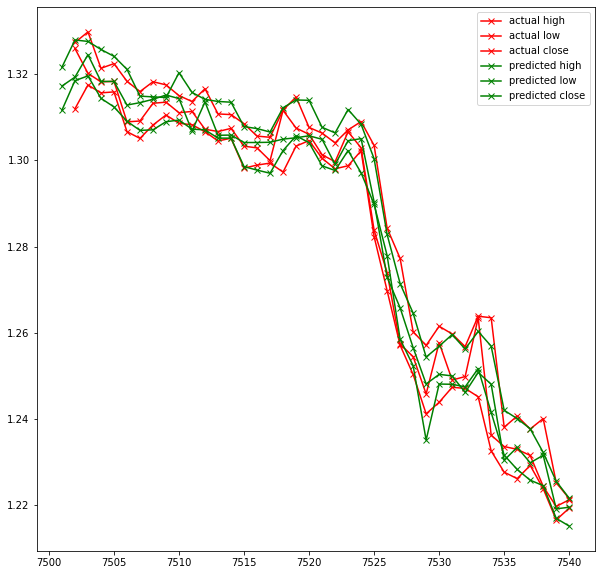

In [343]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
#include actual high and low range
line1_h = plt.plot(df_t.test_high, label = 'actual high', marker='x', color='r')
line1_l = plt.plot(df_t.test_low, label = 'actual low', marker='x', color='r')
line1_c = plt.plot(df_t.test_close, label = 'actual close', marker='x', color='r')

#overlay predicted high and low and close
line2_ph = plt.plot(df_t.pred_h, label = 'predicted high', marker='x', color='g')
line2_pl = plt.plot(df_t.pred_l, label = 'predicted low', marker='x', color='g')
line2_pc = plt.plot(df_t.pred_c, label = 'predicted close', marker='x', color='g')


plt.legend()
plt.show()
 

In [344]:
print(stop_for_sell)
print(stop_for_buy)

count    15.000000
mean      0.002899
std       0.002228
min       0.000520
25%       0.001405
50%       0.002350
75%       0.003445
90%       0.005402
95%       0.006755
99%       0.008407
max       0.008820
Name: stop_for_sell, dtype: float64
count    5.000000
mean     0.001894
std      0.001699
min      0.000420
25%      0.000650
50%      0.001780
75%      0.001930
90%      0.003586
95%      0.004138
99%      0.004580
max      0.004690
Name: stop_for_buy, dtype: float64


In [345]:
# clears the model after a run so you can contrast new runs.
# predictor.unpersist_models('ag_predict_interval')
# predictor.save_space()
# predictor.delete_models(models_to_keep='best', dry_run=False)
%rm -rf agModels-predictHigh 
%rm -rf agModels-predictLow
%rm -rf agModels-predictClose
!ls



EURUSD_Daily_197101040000_202205130000.csv
GBPUSD_Daily_199305120000_202205130000.csv
NZDJPY_Daily_200702120000_202205120000.csv
NZDJPY_Daily_200702120000_202205130000.csv
sample_data
USDCHF_Daily_197101040000_202205130000.csv
USDJPY_Daily_197101040000_202205130000.csv
